<a href="https://colab.research.google.com/github/satabarto123/GDG-Projects/blob/main/deepMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Building Functional MLP Based NN Model**

##**Dataset Chosen :** MNIST [©  Yann LeCun (Courant Institute, NYU) & Corinna Cortes (Google Labs, NYC) ]

##**Notebook Author :** Satabarto Sarkar (Dept of CSE, IEM Salt Lake)

This is an MLP Architecture trained using MNIST dataset and powered by custom designed activation function. Access and use of the data is strictly restricted to Academic Purpose.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Necessary Libs**

In [53]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Datasets/mnist_train.csv')


**Randomizaion of Data**

In [105]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

# **Proposed Neural Network Architecture**

This neural network has a simple three-layer architecture with two hidden layers. The input layer **a[0]** will have 784 units corresponding to the 784 pixels in each 28x28 input image. The two hidden layers, **a[1]** and **a[2]**, will each have 16 units using the custom **mReLU** activation function. Finally, the output layer **a[3]** will have 10 units corresponding to the ten digit classes, using the **softmax** activation function.

## Forward Propagation

**Layer 1 (Input to Hidden Layer 1):**

- Z[1] = W[1]X + b[1]
- A[1] = g(mReLU)(Z[1])

Where Z[1] is the pre-activation of the first hidden layer, W[1] is the weight matrix for the first hidden layer, X is the input data, and b[1] is the bias vector. The activation function g(mReLU) applies the modified ReLU, which uses the Mish function for non-linearity.

**Layer 2 (Hidden Layer 1 to Hidden Layer 2):**

- Z[2] = W[2]A[1] + b[2]
- A[2] = g(mReLU)(Z[2])

Where Z[2] is the pre-activation of the second hidden layer, W[2] is the weight matrix for the second hidden layer, A[1] is the activation from the first hidden layer, and b[2] is the bias for the second hidden layer.

**Layer 3 (Hidden Layer 2 to Output Layer):**

- Z[3] = W[3]A[2] + b[3]
- A[3] = g(softmax)(Z[3])

Where Z[3] is the pre-activation of the output layer, W[3] is the weight matrix for the output layer, A[2] is the activation from the second hidden layer, and b[3] is the bias for the output layer. The softmax activation function converts the output to probabilities for each class.

## Backward Propagation

**Layer 3 (Output Layer to Hidden Layer 2):**

- dZ[3] = A[3] - Y
- dW[3] = (1/m)dZ[3]A[2]ᵀ
- db[3] = (1/m)ΣdZ[3]

Where dZ[3] is the gradient of the loss with respect to Z[3], and dW[3] and db[3] are the gradients of the weights and biases for the output layer. m is the number of training examples.

**Layer 2 (Hidden Layer 2 to Hidden Layer 1):**

- dZ[2] = W[3]ᵀdZ[3] * g'[2]Z[2]
- dW[2] = (1/m)dZ[2]A[1]ᵀ
- db[2] = (1/m)ΣdZ[2]

Where dZ[2] is the gradient of the loss with respect to Z[2], and g'[2]Z[2] is the derivative of the custom mReLU activation function for the second hidden layer.

**Layer 1 (Hidden Layer 1 to Input Layer):**

- dZ[1] = W[2]ᵀdZ[2] * g'[1]Z[1]
- dW[1] = (1/m)dZ[1]Xᵀ
- db[1] = (1/m)ΣdZ[1]

Where dZ[1] is the gradient of the loss with respect to Z[1], and g'[1]Z[1] is the derivative of the custom mReLU activation function for the first hidden layer.

## Parameter Updates

**Update for Layer 3 (Output Layer):**

- W[3] := W[3] - α dW[3]
- b[3] := b[3] - α db[3]

**Update for Layer 2 (Hidden Layer 2):**

- W[2] := W[2] - α dW[2]
- b[2] := b[2] - α db[2]

**Update for Layer 1 (Hidden Layer 1):**

- W[1] := W[1] - α dW[1]
- b[1] := b[1] - α db[1]

Where α is the learning rate, which controls how much the parameters are adjusted after each iteration.

## Variables and Shapes

**Forward Propagation:**

- A[0] = X : 784 x m
- Z[1] ~ A[1] : 16 x m, W[1] : 16 x 784, b[1] : 16 x 1
- Z[2] ~ A[2] : 16 x m, W[2] : 16 x 16, b[2] : 16 x 1
- Z[3] ~ A[3] : 10 x m, W[3] : 10 x 16, b[3] : 10 x 1

Where m is the number of training examples.

**Backward Propagation:**

- dZ[3] : 10 x m, dW[3] : 10 x 16, db[3] : 10 x 1
- dZ[2] : 16 x m, dW[2] : 16 x 16, db[2] : 16 x 1
- dZ[1] : 16 x m, dW[1] : 16 x 784, db[1] : 16 x 1

## Activation Functions

- **mReLU:** The custom activation function that applies the Mish function and returns the maximum of Mish and zero.
  
- **Mish Function:** Defined as:
  
  mish(x) = x * tanh(ln(1 + e^x))

- **softmax:** Converts logits into probabilities for multiclass classification.


**Activation Function**

In [64]:
import numpy as np

def softplus(x):
    return np.log(1 + np.exp(x))

def mish(x):
    return x * np.tanh(softplus(x))

def mish_derivative(x):
    softplus_x = softplus(x)
    tanh_softplus_x = np.tanh(softplus_x)
    return tanh_softplus_x + x * (1 - tanh_softplus_x**2) * (1 / (1 + np.exp(-x)))


# **Necessary Functions**

In [126]:
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(16, 16) - 0.5
    b2 = np.random.rand(16, 1) - 0.5
    W3 = np.random.rand(10, 16) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def mReLU(Z):
    return np.maximum(mish(Z), 0)

def softmax(Z):
    eZ = np.exp(Z - np.max(Z, axis=0))
    return eZ / np.sum(eZ, axis=0)

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = mReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = mReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def mReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * mReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * mReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

def get_predictions(A3):
    return np.argmax(A3, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")

    return W1, b1, W2, b2, W3, b3


# **Train & Plot**

<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))


Iteration: 0, Train Loss: 0.5149, Test Loss: 1.6138, Train Accuracy: 0.0824, Test Accuracy: 0.1179, F1-Score: 0.0462


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 10, Train Loss: 0.1892, Test Loss: 1.2605, Train Accuracy: 0.3181, Test Accuracy: 0.3022, F1-Score: 0.1997


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 20, Train Loss: 0.1488, Test Loss: 0.9933, Train Accuracy: 0.4821, Test Accuracy: 0.4470, F1-Score: 0.3828


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 30, Train Loss: 0.1748, Test Loss: 1.0476, Train Accuracy: 0.3614, Test Accuracy: 0.4148, F1-Score: 0.3594


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 40, Train Loss: 0.1074, Test Loss: 0.7793, Train Accuracy: 0.6288, Test Accuracy: 0.5693, F1-Score: 0.5312


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 50, Train Loss: 0.1018, Test Loss: 0.6964, Train Accuracy: 0.6400, Test Accuracy: 0.6151, F1-Score: 0.5782


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 60, Train Loss: 0.0935, Test Loss: 0.6362, Train Accuracy: 0.6709, Test Accuracy: 0.6471, F1-Score: 0.6121


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 70, Train Loss: 0.0856, Test Loss: 0.6670, Train Accuracy: 0.6989, Test Accuracy: 0.6334, F1-Score: 0.5967


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 80, Train Loss: 0.0896, Test Loss: 0.6223, Train Accuracy: 0.6859, Test Accuracy: 0.6550, F1-Score: 0.6235


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 90, Train Loss: 0.0753, Test Loss: 0.5162, Train Accuracy: 0.7290, Test Accuracy: 0.7151, F1-Score: 0.6928


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 100, Train Loss: 0.0699, Test Loss: 0.4156, Train Accuracy: 0.7606, Test Accuracy: 0.7689, F1-Score: 0.7651


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 110, Train Loss: 0.0786, Test Loss: 0.5369, Train Accuracy: 0.7281, Test Accuracy: 0.7048, F1-Score: 0.6952


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 120, Train Loss: 0.0718, Test Loss: 0.4648, Train Accuracy: 0.7503, Test Accuracy: 0.7438, F1-Score: 0.7287


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 130, Train Loss: 0.0564, Test Loss: 0.3537, Train Accuracy: 0.8133, Test Accuracy: 0.8048, F1-Score: 0.8016


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 140, Train Loss: 0.0534, Test Loss: 0.3425, Train Accuracy: 0.8266, Test Accuracy: 0.8109, F1-Score: 0.8096


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 150, Train Loss: 0.0522, Test Loss: 0.3108, Train Accuracy: 0.8302, Test Accuracy: 0.8286, F1-Score: 0.8281


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 160, Train Loss: 0.0559, Test Loss: 0.2886, Train Accuracy: 0.8189, Test Accuracy: 0.8406, F1-Score: 0.8382


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 170, Train Loss: 0.0485, Test Loss: 0.3156, Train Accuracy: 0.8457, Test Accuracy: 0.8259, F1-Score: 0.8224


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 180, Train Loss: 0.0438, Test Loss: 0.2592, Train Accuracy: 0.8627, Test Accuracy: 0.8569, F1-Score: 0.8558


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 190, Train Loss: 0.0460, Test Loss: 0.2658, Train Accuracy: 0.8534, Test Accuracy: 0.8534, F1-Score: 0.8529


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 200, Train Loss: 0.0409, Test Loss: 0.2589, Train Accuracy: 0.8736, Test Accuracy: 0.8572, F1-Score: 0.8576


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 210, Train Loss: 0.0452, Test Loss: 0.2705, Train Accuracy: 0.8584, Test Accuracy: 0.8511, F1-Score: 0.8520


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 220, Train Loss: 0.0489, Test Loss: 0.2710, Train Accuracy: 0.8419, Test Accuracy: 0.8508, F1-Score: 0.8490


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 230, Train Loss: 0.0385, Test Loss: 0.2362, Train Accuracy: 0.8818, Test Accuracy: 0.8703, F1-Score: 0.8685


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 240, Train Loss: 0.0375, Test Loss: 0.2318, Train Accuracy: 0.8832, Test Accuracy: 0.8721, F1-Score: 0.8709


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 250, Train Loss: 0.0412, Test Loss: 0.2434, Train Accuracy: 0.8697, Test Accuracy: 0.8658, F1-Score: 0.8652


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 260, Train Loss: 0.0352, Test Loss: 0.2184, Train Accuracy: 0.8919, Test Accuracy: 0.8801, F1-Score: 0.8798


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 270, Train Loss: 0.0362, Test Loss: 0.2184, Train Accuracy: 0.8889, Test Accuracy: 0.8800, F1-Score: 0.8799


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 280, Train Loss: 0.0354, Test Loss: 0.2151, Train Accuracy: 0.8918, Test Accuracy: 0.8819, F1-Score: 0.8816


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 290, Train Loss: 0.0331, Test Loss: 0.2130, Train Accuracy: 0.8982, Test Accuracy: 0.8830, F1-Score: 0.8828


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 300, Train Loss: 0.0372, Test Loss: 0.2493, Train Accuracy: 0.8847, Test Accuracy: 0.8625, F1-Score: 0.8638


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 310, Train Loss: 0.0371, Test Loss: 0.2652, Train Accuracy: 0.8872, Test Accuracy: 0.8542, F1-Score: 0.8535


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 320, Train Loss: 0.0322, Test Loss: 0.2190, Train Accuracy: 0.9021, Test Accuracy: 0.8784, F1-Score: 0.8770


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 330, Train Loss: 0.0308, Test Loss: 0.2094, Train Accuracy: 0.9058, Test Accuracy: 0.8844, F1-Score: 0.8830


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 340, Train Loss: 0.0325, Test Loss: 0.2494, Train Accuracy: 0.8991, Test Accuracy: 0.8626, F1-Score: 0.8574


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 350, Train Loss: 0.0307, Test Loss: 0.2099, Train Accuracy: 0.9055, Test Accuracy: 0.8843, F1-Score: 0.8831


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 360, Train Loss: 0.0296, Test Loss: 0.2016, Train Accuracy: 0.9092, Test Accuracy: 0.8889, F1-Score: 0.8879


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 370, Train Loss: 0.0320, Test Loss: 0.2352, Train Accuracy: 0.9024, Test Accuracy: 0.8714, F1-Score: 0.8707


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 380, Train Loss: 0.0305, Test Loss: 0.1993, Train Accuracy: 0.9072, Test Accuracy: 0.8904, F1-Score: 0.8886


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 390, Train Loss: 0.0287, Test Loss: 0.1895, Train Accuracy: 0.9124, Test Accuracy: 0.8955, F1-Score: 0.8943


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 400, Train Loss: 0.0283, Test Loss: 0.1864, Train Accuracy: 0.9135, Test Accuracy: 0.8972, F1-Score: 0.8960


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 410, Train Loss: 0.0282, Test Loss: 0.1849, Train Accuracy: 0.9129, Test Accuracy: 0.8985, F1-Score: 0.8970


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 420, Train Loss: 0.0312, Test Loss: 0.2177, Train Accuracy: 0.9036, Test Accuracy: 0.8805, F1-Score: 0.8761


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 430, Train Loss: 0.0688, Test Loss: 0.3683, Train Accuracy: 0.7436, Test Accuracy: 0.7949, F1-Score: 0.7925


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 440, Train Loss: 0.0303, Test Loss: 0.2039, Train Accuracy: 0.9096, Test Accuracy: 0.8872, F1-Score: 0.8863


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 450, Train Loss: 0.0285, Test Loss: 0.1947, Train Accuracy: 0.9133, Test Accuracy: 0.8925, F1-Score: 0.8915


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 460, Train Loss: 0.0277, Test Loss: 0.1877, Train Accuracy: 0.9153, Test Accuracy: 0.8961, F1-Score: 0.8951


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 470, Train Loss: 0.0271, Test Loss: 0.1823, Train Accuracy: 0.9170, Test Accuracy: 0.8994, F1-Score: 0.8984


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 480, Train Loss: 0.0267, Test Loss: 0.1799, Train Accuracy: 0.9181, Test Accuracy: 0.9004, F1-Score: 0.8995


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 490, Train Loss: 0.0263, Test Loss: 0.1779, Train Accuracy: 0.9193, Test Accuracy: 0.9011, F1-Score: 0.9002


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 500, Train Loss: 0.0260, Test Loss: 0.1761, Train Accuracy: 0.9206, Test Accuracy: 0.9023, F1-Score: 0.9014


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 510, Train Loss: 0.0257, Test Loss: 0.1753, Train Accuracy: 0.9215, Test Accuracy: 0.9036, F1-Score: 0.9028


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 520, Train Loss: 0.0254, Test Loss: 0.1719, Train Accuracy: 0.9223, Test Accuracy: 0.9051, F1-Score: 0.9044


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 530, Train Loss: 0.0260, Test Loss: 0.1614, Train Accuracy: 0.9192, Test Accuracy: 0.9110, F1-Score: 0.9105


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 540, Train Loss: 0.0677, Test Loss: 0.2683, Train Accuracy: 0.7699, Test Accuracy: 0.8513, F1-Score: 0.8443


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 550, Train Loss: 0.0263, Test Loss: 0.1780, Train Accuracy: 0.9204, Test Accuracy: 0.9020, F1-Score: 0.9011


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 560, Train Loss: 0.0254, Test Loss: 0.1727, Train Accuracy: 0.9228, Test Accuracy: 0.9048, F1-Score: 0.9040


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 570, Train Loss: 0.0249, Test Loss: 0.1696, Train Accuracy: 0.9241, Test Accuracy: 0.9069, F1-Score: 0.9061


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 580, Train Loss: 0.0246, Test Loss: 0.1659, Train Accuracy: 0.9250, Test Accuracy: 0.9081, F1-Score: 0.9074


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 590, Train Loss: 0.0243, Test Loss: 0.1659, Train Accuracy: 0.9258, Test Accuracy: 0.9084, F1-Score: 0.9077


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 600, Train Loss: 0.0241, Test Loss: 0.1657, Train Accuracy: 0.9265, Test Accuracy: 0.9082, F1-Score: 0.9075


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 610, Train Loss: 0.0239, Test Loss: 0.1651, Train Accuracy: 0.9272, Test Accuracy: 0.9088, F1-Score: 0.9081


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 620, Train Loss: 0.0237, Test Loss: 0.1636, Train Accuracy: 0.9274, Test Accuracy: 0.9097, F1-Score: 0.9090


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 630, Train Loss: 0.0235, Test Loss: 0.1626, Train Accuracy: 0.9280, Test Accuracy: 0.9104, F1-Score: 0.9097


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 640, Train Loss: 0.0233, Test Loss: 0.1618, Train Accuracy: 0.9283, Test Accuracy: 0.9112, F1-Score: 0.9105


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 650, Train Loss: 0.0232, Test Loss: 0.1606, Train Accuracy: 0.9284, Test Accuracy: 0.9113, F1-Score: 0.9106


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 660, Train Loss: 0.0230, Test Loss: 0.1591, Train Accuracy: 0.9288, Test Accuracy: 0.9123, F1-Score: 0.9116


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 670, Train Loss: 0.0230, Test Loss: 0.1569, Train Accuracy: 0.9287, Test Accuracy: 0.9139, F1-Score: 0.9132


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 680, Train Loss: 0.0262, Test Loss: 0.1781, Train Accuracy: 0.9168, Test Accuracy: 0.9012, F1-Score: 0.9005


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 690, Train Loss: 0.0234, Test Loss: 0.1589, Train Accuracy: 0.9285, Test Accuracy: 0.9122, F1-Score: 0.9115


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 700, Train Loss: 0.0227, Test Loss: 0.1567, Train Accuracy: 0.9304, Test Accuracy: 0.9133, F1-Score: 0.9126


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 710, Train Loss: 0.0225, Test Loss: 0.1555, Train Accuracy: 0.9309, Test Accuracy: 0.9144, F1-Score: 0.9138


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 720, Train Loss: 0.0223, Test Loss: 0.1546, Train Accuracy: 0.9315, Test Accuracy: 0.9148, F1-Score: 0.9142


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 730, Train Loss: 0.0222, Test Loss: 0.1541, Train Accuracy: 0.9320, Test Accuracy: 0.9147, F1-Score: 0.9141


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 740, Train Loss: 0.0220, Test Loss: 0.1540, Train Accuracy: 0.9324, Test Accuracy: 0.9149, F1-Score: 0.9143


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 750, Train Loss: 0.0219, Test Loss: 0.1533, Train Accuracy: 0.9329, Test Accuracy: 0.9153, F1-Score: 0.9147


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 760, Train Loss: 0.0218, Test Loss: 0.1523, Train Accuracy: 0.9331, Test Accuracy: 0.9160, F1-Score: 0.9154


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 770, Train Loss: 0.0216, Test Loss: 0.1517, Train Accuracy: 0.9334, Test Accuracy: 0.9163, F1-Score: 0.9157


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 780, Train Loss: 0.0215, Test Loss: 0.1513, Train Accuracy: 0.9338, Test Accuracy: 0.9169, F1-Score: 0.9163


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 790, Train Loss: 0.0214, Test Loss: 0.1512, Train Accuracy: 0.9343, Test Accuracy: 0.9170, F1-Score: 0.9164


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 800, Train Loss: 0.0214, Test Loss: 0.1519, Train Accuracy: 0.9345, Test Accuracy: 0.9164, F1-Score: 0.9158


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 810, Train Loss: 0.0243, Test Loss: 0.1910, Train Accuracy: 0.9259, Test Accuracy: 0.8949, F1-Score: 0.8942


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 820, Train Loss: 0.0226, Test Loss: 0.1578, Train Accuracy: 0.9316, Test Accuracy: 0.9132, F1-Score: 0.9123


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 830, Train Loss: 0.0212, Test Loss: 0.1500, Train Accuracy: 0.9352, Test Accuracy: 0.9173, F1-Score: 0.9167


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 840, Train Loss: 0.0210, Test Loss: 0.1488, Train Accuracy: 0.9358, Test Accuracy: 0.9179, F1-Score: 0.9173


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 850, Train Loss: 0.0209, Test Loss: 0.1483, Train Accuracy: 0.9360, Test Accuracy: 0.9179, F1-Score: 0.9173


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 860, Train Loss: 0.0207, Test Loss: 0.1476, Train Accuracy: 0.9365, Test Accuracy: 0.9184, F1-Score: 0.9178


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 870, Train Loss: 0.0206, Test Loss: 0.1471, Train Accuracy: 0.9371, Test Accuracy: 0.9187, F1-Score: 0.9181


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 880, Train Loss: 0.0205, Test Loss: 0.1466, Train Accuracy: 0.9375, Test Accuracy: 0.9193, F1-Score: 0.9187


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 890, Train Loss: 0.0204, Test Loss: 0.1459, Train Accuracy: 0.9378, Test Accuracy: 0.9199, F1-Score: 0.9193


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 900, Train Loss: 0.0203, Test Loss: 0.1456, Train Accuracy: 0.9381, Test Accuracy: 0.9200, F1-Score: 0.9194


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 910, Train Loss: 0.0203, Test Loss: 0.1444, Train Accuracy: 0.9383, Test Accuracy: 0.9201, F1-Score: 0.9196


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 920, Train Loss: 0.0203, Test Loss: 0.1431, Train Accuracy: 0.9384, Test Accuracy: 0.9210, F1-Score: 0.9206


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 930, Train Loss: 0.0213, Test Loss: 0.1466, Train Accuracy: 0.9351, Test Accuracy: 0.9191, F1-Score: 0.9190


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 940, Train Loss: 0.0225, Test Loss: 0.1552, Train Accuracy: 0.9317, Test Accuracy: 0.9142, F1-Score: 0.9141


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 950, Train Loss: 0.0203, Test Loss: 0.1502, Train Accuracy: 0.9388, Test Accuracy: 0.9176, F1-Score: 0.9170


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 960, Train Loss: 0.0201, Test Loss: 0.1516, Train Accuracy: 0.9394, Test Accuracy: 0.9168, F1-Score: 0.9161


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 970, Train Loss: 0.0204, Test Loss: 0.1558, Train Accuracy: 0.9383, Test Accuracy: 0.9141, F1-Score: 0.9133


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 980, Train Loss: 0.0212, Test Loss: 0.1648, Train Accuracy: 0.9354, Test Accuracy: 0.9083, F1-Score: 0.9073


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 990, Train Loss: 0.0203, Test Loss: 0.1538, Train Accuracy: 0.9388, Test Accuracy: 0.9157, F1-Score: 0.9149


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1000, Train Loss: 0.0197, Test Loss: 0.1465, Train Accuracy: 0.9406, Test Accuracy: 0.9198, F1-Score: 0.9192


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1010, Train Loss: 0.0196, Test Loss: 0.1448, Train Accuracy: 0.9408, Test Accuracy: 0.9205, F1-Score: 0.9200


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1020, Train Loss: 0.0196, Test Loss: 0.1443, Train Accuracy: 0.9409, Test Accuracy: 0.9206, F1-Score: 0.9201


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1030, Train Loss: 0.0200, Test Loss: 0.1515, Train Accuracy: 0.9392, Test Accuracy: 0.9169, F1-Score: 0.9164


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1040, Train Loss: 0.0209, Test Loss: 0.1613, Train Accuracy: 0.9366, Test Accuracy: 0.9115, F1-Score: 0.9110


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1050, Train Loss: 0.0199, Test Loss: 0.1505, Train Accuracy: 0.9400, Test Accuracy: 0.9169, F1-Score: 0.9163


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1060, Train Loss: 0.0192, Test Loss: 0.1441, Train Accuracy: 0.9418, Test Accuracy: 0.9212, F1-Score: 0.9207


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1070, Train Loss: 0.0191, Test Loss: 0.1428, Train Accuracy: 0.9425, Test Accuracy: 0.9216, F1-Score: 0.9210


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1080, Train Loss: 0.0190, Test Loss: 0.1437, Train Accuracy: 0.9425, Test Accuracy: 0.9210, F1-Score: 0.9204


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1090, Train Loss: 0.0193, Test Loss: 0.1498, Train Accuracy: 0.9418, Test Accuracy: 0.9176, F1-Score: 0.9170


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1100, Train Loss: 0.0204, Test Loss: 0.1612, Train Accuracy: 0.9382, Test Accuracy: 0.9114, F1-Score: 0.9108


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1110, Train Loss: 0.0201, Test Loss: 0.1569, Train Accuracy: 0.9392, Test Accuracy: 0.9139, F1-Score: 0.9133


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1120, Train Loss: 0.0188, Test Loss: 0.1427, Train Accuracy: 0.9432, Test Accuracy: 0.9217, F1-Score: 0.9212


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1130, Train Loss: 0.0186, Test Loss: 0.1400, Train Accuracy: 0.9435, Test Accuracy: 0.9230, F1-Score: 0.9225


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1140, Train Loss: 0.0186, Test Loss: 0.1401, Train Accuracy: 0.9435, Test Accuracy: 0.9232, F1-Score: 0.9227


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1150, Train Loss: 0.0187, Test Loss: 0.1412, Train Accuracy: 0.9433, Test Accuracy: 0.9224, F1-Score: 0.9220


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1160, Train Loss: 0.0192, Test Loss: 0.1480, Train Accuracy: 0.9414, Test Accuracy: 0.9189, F1-Score: 0.9186


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1170, Train Loss: 0.0201, Test Loss: 0.1559, Train Accuracy: 0.9388, Test Accuracy: 0.9143, F1-Score: 0.9140


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1180, Train Loss: 0.0190, Test Loss: 0.1514, Train Accuracy: 0.9427, Test Accuracy: 0.9168, F1-Score: 0.9163


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1190, Train Loss: 0.0185, Test Loss: 0.1483, Train Accuracy: 0.9443, Test Accuracy: 0.9187, F1-Score: 0.9181


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1200, Train Loss: 0.0185, Test Loss: 0.1477, Train Accuracy: 0.9443, Test Accuracy: 0.9191, F1-Score: 0.9184


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1210, Train Loss: 0.0187, Test Loss: 0.1517, Train Accuracy: 0.9434, Test Accuracy: 0.9168, F1-Score: 0.9160


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1220, Train Loss: 0.0192, Test Loss: 0.1558, Train Accuracy: 0.9418, Test Accuracy: 0.9146, F1-Score: 0.9138


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1230, Train Loss: 0.0186, Test Loss: 0.1489, Train Accuracy: 0.9439, Test Accuracy: 0.9183, F1-Score: 0.9176


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1240, Train Loss: 0.0181, Test Loss: 0.1432, Train Accuracy: 0.9453, Test Accuracy: 0.9213, F1-Score: 0.9208


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1250, Train Loss: 0.0181, Test Loss: 0.1423, Train Accuracy: 0.9453, Test Accuracy: 0.9217, F1-Score: 0.9212


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1260, Train Loss: 0.0185, Test Loss: 0.1466, Train Accuracy: 0.9440, Test Accuracy: 0.9194, F1-Score: 0.9191


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1270, Train Loss: 0.0194, Test Loss: 0.1522, Train Accuracy: 0.9412, Test Accuracy: 0.9159, F1-Score: 0.9156


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1280, Train Loss: 0.0184, Test Loss: 0.1445, Train Accuracy: 0.9441, Test Accuracy: 0.9204, F1-Score: 0.9200


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1290, Train Loss: 0.0178, Test Loss: 0.1393, Train Accuracy: 0.9462, Test Accuracy: 0.9230, F1-Score: 0.9226


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1300, Train Loss: 0.0177, Test Loss: 0.1391, Train Accuracy: 0.9467, Test Accuracy: 0.9233, F1-Score: 0.9229


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1310, Train Loss: 0.0177, Test Loss: 0.1421, Train Accuracy: 0.9463, Test Accuracy: 0.9214, F1-Score: 0.9210


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1320, Train Loss: 0.0180, Test Loss: 0.1476, Train Accuracy: 0.9454, Test Accuracy: 0.9184, F1-Score: 0.9179


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1330, Train Loss: 0.0188, Test Loss: 0.1560, Train Accuracy: 0.9433, Test Accuracy: 0.9145, F1-Score: 0.9139


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1340, Train Loss: 0.0182, Test Loss: 0.1503, Train Accuracy: 0.9450, Test Accuracy: 0.9176, F1-Score: 0.9170


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1350, Train Loss: 0.0175, Test Loss: 0.1419, Train Accuracy: 0.9470, Test Accuracy: 0.9217, F1-Score: 0.9212


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1360, Train Loss: 0.0174, Test Loss: 0.1402, Train Accuracy: 0.9475, Test Accuracy: 0.9231, F1-Score: 0.9226


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1370, Train Loss: 0.0174, Test Loss: 0.1431, Train Accuracy: 0.9475, Test Accuracy: 0.9219, F1-Score: 0.9214


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1380, Train Loss: 0.0176, Test Loss: 0.1468, Train Accuracy: 0.9468, Test Accuracy: 0.9196, F1-Score: 0.9190


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1390, Train Loss: 0.0179, Test Loss: 0.1499, Train Accuracy: 0.9458, Test Accuracy: 0.9178, F1-Score: 0.9172


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1400, Train Loss: 0.0177, Test Loss: 0.1489, Train Accuracy: 0.9463, Test Accuracy: 0.9182, F1-Score: 0.9176


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1410, Train Loss: 0.0175, Test Loss: 0.1471, Train Accuracy: 0.9465, Test Accuracy: 0.9191, F1-Score: 0.9186


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1420, Train Loss: 0.0181, Test Loss: 0.1482, Train Accuracy: 0.9454, Test Accuracy: 0.9188, F1-Score: 0.9183


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1430, Train Loss: 0.0186, Test Loss: 0.1475, Train Accuracy: 0.9438, Test Accuracy: 0.9183, F1-Score: 0.9180


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1440, Train Loss: 0.0173, Test Loss: 0.1381, Train Accuracy: 0.9478, Test Accuracy: 0.9241, F1-Score: 0.9238


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1450, Train Loss: 0.0170, Test Loss: 0.1359, Train Accuracy: 0.9488, Test Accuracy: 0.9252, F1-Score: 0.9248


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1460, Train Loss: 0.0169, Test Loss: 0.1364, Train Accuracy: 0.9489, Test Accuracy: 0.9250, F1-Score: 0.9246


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1470, Train Loss: 0.0168, Test Loss: 0.1371, Train Accuracy: 0.9490, Test Accuracy: 0.9243, F1-Score: 0.9239


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1480, Train Loss: 0.0169, Test Loss: 0.1385, Train Accuracy: 0.9487, Test Accuracy: 0.9237, F1-Score: 0.9233


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1490, Train Loss: 0.0174, Test Loss: 0.1448, Train Accuracy: 0.9476, Test Accuracy: 0.9202, F1-Score: 0.9197


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1500, Train Loss: 0.0190, Test Loss: 0.1575, Train Accuracy: 0.9428, Test Accuracy: 0.9135, F1-Score: 0.9130


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1510, Train Loss: 0.0170, Test Loss: 0.1399, Train Accuracy: 0.9486, Test Accuracy: 0.9226, F1-Score: 0.9222


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1520, Train Loss: 0.0166, Test Loss: 0.1370, Train Accuracy: 0.9497, Test Accuracy: 0.9246, F1-Score: 0.9242


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1530, Train Loss: 0.0165, Test Loss: 0.1363, Train Accuracy: 0.9498, Test Accuracy: 0.9251, F1-Score: 0.9247


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1540, Train Loss: 0.0165, Test Loss: 0.1371, Train Accuracy: 0.9501, Test Accuracy: 0.9249, F1-Score: 0.9245


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1550, Train Loss: 0.0165, Test Loss: 0.1388, Train Accuracy: 0.9500, Test Accuracy: 0.9234, F1-Score: 0.9230


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1560, Train Loss: 0.0167, Test Loss: 0.1434, Train Accuracy: 0.9492, Test Accuracy: 0.9211, F1-Score: 0.9206


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1570, Train Loss: 0.0177, Test Loss: 0.1541, Train Accuracy: 0.9460, Test Accuracy: 0.9152, F1-Score: 0.9147


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1580, Train Loss: 0.0180, Test Loss: 0.1535, Train Accuracy: 0.9457, Test Accuracy: 0.9157, F1-Score: 0.9151


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1590, Train Loss: 0.0164, Test Loss: 0.1403, Train Accuracy: 0.9502, Test Accuracy: 0.9229, F1-Score: 0.9225


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1600, Train Loss: 0.0162, Test Loss: 0.1369, Train Accuracy: 0.9510, Test Accuracy: 0.9245, F1-Score: 0.9241


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1610, Train Loss: 0.0162, Test Loss: 0.1359, Train Accuracy: 0.9510, Test Accuracy: 0.9252, F1-Score: 0.9248


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1620, Train Loss: 0.0165, Test Loss: 0.1388, Train Accuracy: 0.9500, Test Accuracy: 0.9236, F1-Score: 0.9233


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1630, Train Loss: 0.0177, Test Loss: 0.1456, Train Accuracy: 0.9472, Test Accuracy: 0.9195, F1-Score: 0.9193


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1640, Train Loss: 0.0173, Test Loss: 0.1420, Train Accuracy: 0.9479, Test Accuracy: 0.9214, F1-Score: 0.9212


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1650, Train Loss: 0.0162, Test Loss: 0.1355, Train Accuracy: 0.9513, Test Accuracy: 0.9254, F1-Score: 0.9251


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1660, Train Loss: 0.0160, Test Loss: 0.1343, Train Accuracy: 0.9520, Test Accuracy: 0.9260, F1-Score: 0.9256


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1670, Train Loss: 0.0159, Test Loss: 0.1345, Train Accuracy: 0.9520, Test Accuracy: 0.9261, F1-Score: 0.9257


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1680, Train Loss: 0.0159, Test Loss: 0.1349, Train Accuracy: 0.9521, Test Accuracy: 0.9258, F1-Score: 0.9254


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1690, Train Loss: 0.0160, Test Loss: 0.1370, Train Accuracy: 0.9517, Test Accuracy: 0.9246, F1-Score: 0.9243


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1700, Train Loss: 0.0163, Test Loss: 0.1415, Train Accuracy: 0.9505, Test Accuracy: 0.9223, F1-Score: 0.9220


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1710, Train Loss: 0.0176, Test Loss: 0.1571, Train Accuracy: 0.9469, Test Accuracy: 0.9138, F1-Score: 0.9133


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1720, Train Loss: 0.0171, Test Loss: 0.1495, Train Accuracy: 0.9479, Test Accuracy: 0.9181, F1-Score: 0.9176


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1730, Train Loss: 0.0159, Test Loss: 0.1386, Train Accuracy: 0.9516, Test Accuracy: 0.9237, F1-Score: 0.9233


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1740, Train Loss: 0.0159, Test Loss: 0.1387, Train Accuracy: 0.9512, Test Accuracy: 0.9239, F1-Score: 0.9235


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1750, Train Loss: 0.0161, Test Loss: 0.1410, Train Accuracy: 0.9505, Test Accuracy: 0.9218, F1-Score: 0.9214


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1760, Train Loss: 0.0163, Test Loss: 0.1414, Train Accuracy: 0.9501, Test Accuracy: 0.9222, F1-Score: 0.9218


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1770, Train Loss: 0.0159, Test Loss: 0.1378, Train Accuracy: 0.9514, Test Accuracy: 0.9245, F1-Score: 0.9242


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1780, Train Loss: 0.0157, Test Loss: 0.1367, Train Accuracy: 0.9522, Test Accuracy: 0.9252, F1-Score: 0.9249


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1790, Train Loss: 0.0156, Test Loss: 0.1372, Train Accuracy: 0.9528, Test Accuracy: 0.9248, F1-Score: 0.9245


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1800, Train Loss: 0.0156, Test Loss: 0.1383, Train Accuracy: 0.9525, Test Accuracy: 0.9241, F1-Score: 0.9238


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1810, Train Loss: 0.0160, Test Loss: 0.1465, Train Accuracy: 0.9514, Test Accuracy: 0.9194, F1-Score: 0.9190


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1820, Train Loss: 0.0172, Test Loss: 0.1556, Train Accuracy: 0.9480, Test Accuracy: 0.9144, F1-Score: 0.9139


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1830, Train Loss: 0.0162, Test Loss: 0.1421, Train Accuracy: 0.9510, Test Accuracy: 0.9219, F1-Score: 0.9216


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1840, Train Loss: 0.0155, Test Loss: 0.1349, Train Accuracy: 0.9532, Test Accuracy: 0.9255, F1-Score: 0.9252


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1850, Train Loss: 0.0154, Test Loss: 0.1323, Train Accuracy: 0.9535, Test Accuracy: 0.9267, F1-Score: 0.9264


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1860, Train Loss: 0.0156, Test Loss: 0.1308, Train Accuracy: 0.9529, Test Accuracy: 0.9278, F1-Score: 0.9276


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1870, Train Loss: 0.0160, Test Loss: 0.1275, Train Accuracy: 0.9515, Test Accuracy: 0.9295, F1-Score: 0.9294


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1880, Train Loss: 0.0162, Test Loss: 0.1285, Train Accuracy: 0.9508, Test Accuracy: 0.9291, F1-Score: 0.9290


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1890, Train Loss: 0.0157, Test Loss: 0.1293, Train Accuracy: 0.9525, Test Accuracy: 0.9282, F1-Score: 0.9280


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1900, Train Loss: 0.0153, Test Loss: 0.1315, Train Accuracy: 0.9535, Test Accuracy: 0.9275, F1-Score: 0.9273


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1910, Train Loss: 0.0152, Test Loss: 0.1318, Train Accuracy: 0.9539, Test Accuracy: 0.9270, F1-Score: 0.9268


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1920, Train Loss: 0.0152, Test Loss: 0.1355, Train Accuracy: 0.9542, Test Accuracy: 0.9254, F1-Score: 0.9251


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1930, Train Loss: 0.0154, Test Loss: 0.1404, Train Accuracy: 0.9535, Test Accuracy: 0.9227, F1-Score: 0.9224


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1940, Train Loss: 0.0167, Test Loss: 0.1565, Train Accuracy: 0.9492, Test Accuracy: 0.9140, F1-Score: 0.9136


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1950, Train Loss: 0.0166, Test Loss: 0.1509, Train Accuracy: 0.9494, Test Accuracy: 0.9172, F1-Score: 0.9168


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1960, Train Loss: 0.0150, Test Loss: 0.1351, Train Accuracy: 0.9543, Test Accuracy: 0.9258, F1-Score: 0.9254


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1970, Train Loss: 0.0150, Test Loss: 0.1349, Train Accuracy: 0.9545, Test Accuracy: 0.9261, F1-Score: 0.9258


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1980, Train Loss: 0.0150, Test Loss: 0.1352, Train Accuracy: 0.9543, Test Accuracy: 0.9256, F1-Score: 0.9253


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 1990, Train Loss: 0.0153, Test Loss: 0.1373, Train Accuracy: 0.9531, Test Accuracy: 0.9243, F1-Score: 0.9240


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2000, Train Loss: 0.0155, Test Loss: 0.1418, Train Accuracy: 0.9523, Test Accuracy: 0.9221, F1-Score: 0.9218


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2010, Train Loss: 0.0152, Test Loss: 0.1373, Train Accuracy: 0.9536, Test Accuracy: 0.9246, F1-Score: 0.9243


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2020, Train Loss: 0.0149, Test Loss: 0.1350, Train Accuracy: 0.9547, Test Accuracy: 0.9258, F1-Score: 0.9255


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2030, Train Loss: 0.0148, Test Loss: 0.1342, Train Accuracy: 0.9550, Test Accuracy: 0.9262, F1-Score: 0.9259


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2040, Train Loss: 0.0148, Test Loss: 0.1363, Train Accuracy: 0.9549, Test Accuracy: 0.9248, F1-Score: 0.9245


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2050, Train Loss: 0.0149, Test Loss: 0.1395, Train Accuracy: 0.9549, Test Accuracy: 0.9233, F1-Score: 0.9229


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2060, Train Loss: 0.0153, Test Loss: 0.1446, Train Accuracy: 0.9537, Test Accuracy: 0.9201, F1-Score: 0.9197


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2070, Train Loss: 0.0162, Test Loss: 0.1531, Train Accuracy: 0.9510, Test Accuracy: 0.9159, F1-Score: 0.9155


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2080, Train Loss: 0.0151, Test Loss: 0.1399, Train Accuracy: 0.9545, Test Accuracy: 0.9232, F1-Score: 0.9229


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2090, Train Loss: 0.0147, Test Loss: 0.1339, Train Accuracy: 0.9555, Test Accuracy: 0.9265, F1-Score: 0.9263


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2100, Train Loss: 0.0150, Test Loss: 0.1345, Train Accuracy: 0.9541, Test Accuracy: 0.9262, F1-Score: 0.9261


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2110, Train Loss: 0.0160, Test Loss: 0.1411, Train Accuracy: 0.9511, Test Accuracy: 0.9222, F1-Score: 0.9222


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2120, Train Loss: 0.0159, Test Loss: 0.1386, Train Accuracy: 0.9511, Test Accuracy: 0.9239, F1-Score: 0.9238


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2130, Train Loss: 0.0148, Test Loss: 0.1291, Train Accuracy: 0.9551, Test Accuracy: 0.9287, F1-Score: 0.9286


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2140, Train Loss: 0.0146, Test Loss: 0.1265, Train Accuracy: 0.9559, Test Accuracy: 0.9304, F1-Score: 0.9302


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2150, Train Loss: 0.0146, Test Loss: 0.1248, Train Accuracy: 0.9561, Test Accuracy: 0.9315, F1-Score: 0.9313


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2160, Train Loss: 0.0147, Test Loss: 0.1232, Train Accuracy: 0.9559, Test Accuracy: 0.9324, F1-Score: 0.9321


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2170, Train Loss: 0.0150, Test Loss: 0.1220, Train Accuracy: 0.9552, Test Accuracy: 0.9328, F1-Score: 0.9325


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2180, Train Loss: 0.0149, Test Loss: 0.1201, Train Accuracy: 0.9554, Test Accuracy: 0.9337, F1-Score: 0.9334


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2190, Train Loss: 0.0146, Test Loss: 0.1208, Train Accuracy: 0.9562, Test Accuracy: 0.9337, F1-Score: 0.9334


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2200, Train Loss: 0.0146, Test Loss: 0.1203, Train Accuracy: 0.9560, Test Accuracy: 0.9339, F1-Score: 0.9337


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2210, Train Loss: 0.0147, Test Loss: 0.1198, Train Accuracy: 0.9557, Test Accuracy: 0.9340, F1-Score: 0.9338


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2220, Train Loss: 0.0148, Test Loss: 0.1197, Train Accuracy: 0.9554, Test Accuracy: 0.9338, F1-Score: 0.9336


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2230, Train Loss: 0.0148, Test Loss: 0.1235, Train Accuracy: 0.9555, Test Accuracy: 0.9320, F1-Score: 0.9317


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2240, Train Loss: 0.0147, Test Loss: 0.1262, Train Accuracy: 0.9556, Test Accuracy: 0.9300, F1-Score: 0.9296


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2250, Train Loss: 0.0146, Test Loss: 0.1294, Train Accuracy: 0.9561, Test Accuracy: 0.9287, F1-Score: 0.9283


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2260, Train Loss: 0.0146, Test Loss: 0.1325, Train Accuracy: 0.9559, Test Accuracy: 0.9270, F1-Score: 0.9266


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2270, Train Loss: 0.0146, Test Loss: 0.1335, Train Accuracy: 0.9558, Test Accuracy: 0.9266, F1-Score: 0.9262


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2280, Train Loss: 0.0146, Test Loss: 0.1367, Train Accuracy: 0.9555, Test Accuracy: 0.9251, F1-Score: 0.9247


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2290, Train Loss: 0.0147, Test Loss: 0.1398, Train Accuracy: 0.9552, Test Accuracy: 0.9232, F1-Score: 0.9228


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2300, Train Loss: 0.0146, Test Loss: 0.1408, Train Accuracy: 0.9556, Test Accuracy: 0.9224, F1-Score: 0.9221


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2310, Train Loss: 0.0143, Test Loss: 0.1386, Train Accuracy: 0.9564, Test Accuracy: 0.9234, F1-Score: 0.9231


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2320, Train Loss: 0.0142, Test Loss: 0.1377, Train Accuracy: 0.9571, Test Accuracy: 0.9243, F1-Score: 0.9241


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2330, Train Loss: 0.0141, Test Loss: 0.1384, Train Accuracy: 0.9573, Test Accuracy: 0.9239, F1-Score: 0.9237


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2340, Train Loss: 0.0142, Test Loss: 0.1400, Train Accuracy: 0.9571, Test Accuracy: 0.9234, F1-Score: 0.9232


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2350, Train Loss: 0.0145, Test Loss: 0.1453, Train Accuracy: 0.9559, Test Accuracy: 0.9203, F1-Score: 0.9202


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2360, Train Loss: 0.0149, Test Loss: 0.1490, Train Accuracy: 0.9549, Test Accuracy: 0.9183, F1-Score: 0.9181


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2370, Train Loss: 0.0148, Test Loss: 0.1441, Train Accuracy: 0.9556, Test Accuracy: 0.9209, F1-Score: 0.9207


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2380, Train Loss: 0.0141, Test Loss: 0.1342, Train Accuracy: 0.9572, Test Accuracy: 0.9264, F1-Score: 0.9262


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2390, Train Loss: 0.0139, Test Loss: 0.1294, Train Accuracy: 0.9578, Test Accuracy: 0.9284, F1-Score: 0.9282


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2400, Train Loss: 0.0139, Test Loss: 0.1265, Train Accuracy: 0.9577, Test Accuracy: 0.9304, F1-Score: 0.9303


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2410, Train Loss: 0.0141, Test Loss: 0.1250, Train Accuracy: 0.9570, Test Accuracy: 0.9311, F1-Score: 0.9310


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2420, Train Loss: 0.0146, Test Loss: 0.1218, Train Accuracy: 0.9557, Test Accuracy: 0.9325, F1-Score: 0.9324


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2430, Train Loss: 0.0148, Test Loss: 0.1201, Train Accuracy: 0.9546, Test Accuracy: 0.9341, F1-Score: 0.9340


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2440, Train Loss: 0.0141, Test Loss: 0.1210, Train Accuracy: 0.9574, Test Accuracy: 0.9333, F1-Score: 0.9332


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2450, Train Loss: 0.0138, Test Loss: 0.1215, Train Accuracy: 0.9582, Test Accuracy: 0.9329, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2460, Train Loss: 0.0137, Test Loss: 0.1228, Train Accuracy: 0.9586, Test Accuracy: 0.9322, F1-Score: 0.9320


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2470, Train Loss: 0.0137, Test Loss: 0.1229, Train Accuracy: 0.9586, Test Accuracy: 0.9323, F1-Score: 0.9321


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2480, Train Loss: 0.0137, Test Loss: 0.1218, Train Accuracy: 0.9586, Test Accuracy: 0.9329, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2490, Train Loss: 0.0140, Test Loss: 0.1176, Train Accuracy: 0.9577, Test Accuracy: 0.9352, F1-Score: 0.9350


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2500, Train Loss: 0.0144, Test Loss: 0.1162, Train Accuracy: 0.9562, Test Accuracy: 0.9358, F1-Score: 0.9356


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2510, Train Loss: 0.0144, Test Loss: 0.1183, Train Accuracy: 0.9566, Test Accuracy: 0.9347, F1-Score: 0.9344


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2520, Train Loss: 0.0139, Test Loss: 0.1217, Train Accuracy: 0.9583, Test Accuracy: 0.9331, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2530, Train Loss: 0.0137, Test Loss: 0.1245, Train Accuracy: 0.9589, Test Accuracy: 0.9316, F1-Score: 0.9312


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2540, Train Loss: 0.0137, Test Loss: 0.1263, Train Accuracy: 0.9591, Test Accuracy: 0.9304, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2550, Train Loss: 0.0137, Test Loss: 0.1279, Train Accuracy: 0.9591, Test Accuracy: 0.9294, F1-Score: 0.9290


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2560, Train Loss: 0.0138, Test Loss: 0.1305, Train Accuracy: 0.9589, Test Accuracy: 0.9285, F1-Score: 0.9281


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2570, Train Loss: 0.0141, Test Loss: 0.1367, Train Accuracy: 0.9575, Test Accuracy: 0.9250, F1-Score: 0.9246


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2580, Train Loss: 0.0150, Test Loss: 0.1458, Train Accuracy: 0.9535, Test Accuracy: 0.9203, F1-Score: 0.9199


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2590, Train Loss: 0.0145, Test Loss: 0.1419, Train Accuracy: 0.9555, Test Accuracy: 0.9221, F1-Score: 0.9219


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2600, Train Loss: 0.0134, Test Loss: 0.1358, Train Accuracy: 0.9599, Test Accuracy: 0.9249, F1-Score: 0.9247


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2610, Train Loss: 0.0133, Test Loss: 0.1333, Train Accuracy: 0.9601, Test Accuracy: 0.9262, F1-Score: 0.9260


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2620, Train Loss: 0.0133, Test Loss: 0.1333, Train Accuracy: 0.9602, Test Accuracy: 0.9262, F1-Score: 0.9260


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2630, Train Loss: 0.0133, Test Loss: 0.1361, Train Accuracy: 0.9603, Test Accuracy: 0.9251, F1-Score: 0.9250


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2640, Train Loss: 0.0135, Test Loss: 0.1433, Train Accuracy: 0.9595, Test Accuracy: 0.9210, F1-Score: 0.9209


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2650, Train Loss: 0.0144, Test Loss: 0.1579, Train Accuracy: 0.9562, Test Accuracy: 0.9132, F1-Score: 0.9131


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2660, Train Loss: 0.0151, Test Loss: 0.1613, Train Accuracy: 0.9537, Test Accuracy: 0.9115, F1-Score: 0.9114


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2670, Train Loss: 0.0134, Test Loss: 0.1374, Train Accuracy: 0.9597, Test Accuracy: 0.9243, F1-Score: 0.9242


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2680, Train Loss: 0.0132, Test Loss: 0.1333, Train Accuracy: 0.9604, Test Accuracy: 0.9269, F1-Score: 0.9268


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2690, Train Loss: 0.0132, Test Loss: 0.1319, Train Accuracy: 0.9602, Test Accuracy: 0.9274, F1-Score: 0.9273


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2700, Train Loss: 0.0133, Test Loss: 0.1315, Train Accuracy: 0.9596, Test Accuracy: 0.9278, F1-Score: 0.9277


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2710, Train Loss: 0.0138, Test Loss: 0.1308, Train Accuracy: 0.9580, Test Accuracy: 0.9281, F1-Score: 0.9280


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2720, Train Loss: 0.0148, Test Loss: 0.1295, Train Accuracy: 0.9545, Test Accuracy: 0.9285, F1-Score: 0.9285


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2730, Train Loss: 0.0139, Test Loss: 0.1273, Train Accuracy: 0.9574, Test Accuracy: 0.9303, F1-Score: 0.9302


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2740, Train Loss: 0.0132, Test Loss: 0.1276, Train Accuracy: 0.9603, Test Accuracy: 0.9295, F1-Score: 0.9294


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2750, Train Loss: 0.0131, Test Loss: 0.1282, Train Accuracy: 0.9605, Test Accuracy: 0.9294, F1-Score: 0.9293


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2760, Train Loss: 0.0131, Test Loss: 0.1285, Train Accuracy: 0.9605, Test Accuracy: 0.9293, F1-Score: 0.9292


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2770, Train Loss: 0.0131, Test Loss: 0.1295, Train Accuracy: 0.9606, Test Accuracy: 0.9294, F1-Score: 0.9293


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2780, Train Loss: 0.0132, Test Loss: 0.1272, Train Accuracy: 0.9604, Test Accuracy: 0.9302, F1-Score: 0.9301


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2790, Train Loss: 0.0135, Test Loss: 0.1232, Train Accuracy: 0.9594, Test Accuracy: 0.9322, F1-Score: 0.9321


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2800, Train Loss: 0.0143, Test Loss: 0.1163, Train Accuracy: 0.9561, Test Accuracy: 0.9364, F1-Score: 0.9363


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2810, Train Loss: 0.0145, Test Loss: 0.1147, Train Accuracy: 0.9555, Test Accuracy: 0.9371, F1-Score: 0.9370


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2820, Train Loss: 0.0130, Test Loss: 0.1234, Train Accuracy: 0.9609, Test Accuracy: 0.9321, F1-Score: 0.9318


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2830, Train Loss: 0.0129, Test Loss: 0.1248, Train Accuracy: 0.9611, Test Accuracy: 0.9312, F1-Score: 0.9309


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2840, Train Loss: 0.0130, Test Loss: 0.1254, Train Accuracy: 0.9607, Test Accuracy: 0.9314, F1-Score: 0.9311


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2850, Train Loss: 0.0132, Test Loss: 0.1245, Train Accuracy: 0.9601, Test Accuracy: 0.9317, F1-Score: 0.9314


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2860, Train Loss: 0.0135, Test Loss: 0.1229, Train Accuracy: 0.9593, Test Accuracy: 0.9326, F1-Score: 0.9322


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2870, Train Loss: 0.0136, Test Loss: 0.1234, Train Accuracy: 0.9588, Test Accuracy: 0.9323, F1-Score: 0.9320


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2880, Train Loss: 0.0132, Test Loss: 0.1256, Train Accuracy: 0.9604, Test Accuracy: 0.9310, F1-Score: 0.9307


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2890, Train Loss: 0.0129, Test Loss: 0.1261, Train Accuracy: 0.9609, Test Accuracy: 0.9308, F1-Score: 0.9305


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2900, Train Loss: 0.0128, Test Loss: 0.1266, Train Accuracy: 0.9613, Test Accuracy: 0.9305, F1-Score: 0.9302


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2910, Train Loss: 0.0128, Test Loss: 0.1280, Train Accuracy: 0.9613, Test Accuracy: 0.9298, F1-Score: 0.9296


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2920, Train Loss: 0.0130, Test Loss: 0.1328, Train Accuracy: 0.9607, Test Accuracy: 0.9268, F1-Score: 0.9266


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2930, Train Loss: 0.0138, Test Loss: 0.1455, Train Accuracy: 0.9575, Test Accuracy: 0.9201, F1-Score: 0.9199


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2940, Train Loss: 0.0189, Test Loss: 0.1995, Train Accuracy: 0.9417, Test Accuracy: 0.8903, F1-Score: 0.8905


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2950, Train Loss: 0.0128, Test Loss: 0.1332, Train Accuracy: 0.9618, Test Accuracy: 0.9265, F1-Score: 0.9263


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2960, Train Loss: 0.0127, Test Loss: 0.1295, Train Accuracy: 0.9623, Test Accuracy: 0.9286, F1-Score: 0.9284


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2970, Train Loss: 0.0126, Test Loss: 0.1291, Train Accuracy: 0.9623, Test Accuracy: 0.9291, F1-Score: 0.9289


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2980, Train Loss: 0.0126, Test Loss: 0.1289, Train Accuracy: 0.9623, Test Accuracy: 0.9295, F1-Score: 0.9293


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 2990, Train Loss: 0.0126, Test Loss: 0.1296, Train Accuracy: 0.9625, Test Accuracy: 0.9286, F1-Score: 0.9284


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3000, Train Loss: 0.0126, Test Loss: 0.1326, Train Accuracy: 0.9625, Test Accuracy: 0.9275, F1-Score: 0.9274


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3010, Train Loss: 0.0126, Test Loss: 0.1355, Train Accuracy: 0.9623, Test Accuracy: 0.9258, F1-Score: 0.9257


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3020, Train Loss: 0.0128, Test Loss: 0.1392, Train Accuracy: 0.9615, Test Accuracy: 0.9234, F1-Score: 0.9233


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3030, Train Loss: 0.0134, Test Loss: 0.1455, Train Accuracy: 0.9597, Test Accuracy: 0.9202, F1-Score: 0.9202


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3040, Train Loss: 0.0138, Test Loss: 0.1495, Train Accuracy: 0.9584, Test Accuracy: 0.9175, F1-Score: 0.9174


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3050, Train Loss: 0.0132, Test Loss: 0.1416, Train Accuracy: 0.9605, Test Accuracy: 0.9222, F1-Score: 0.9221


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3060, Train Loss: 0.0127, Test Loss: 0.1356, Train Accuracy: 0.9621, Test Accuracy: 0.9252, F1-Score: 0.9251


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3070, Train Loss: 0.0125, Test Loss: 0.1318, Train Accuracy: 0.9627, Test Accuracy: 0.9275, F1-Score: 0.9274


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3080, Train Loss: 0.0126, Test Loss: 0.1258, Train Accuracy: 0.9623, Test Accuracy: 0.9309, F1-Score: 0.9308


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3090, Train Loss: 0.0130, Test Loss: 0.1212, Train Accuracy: 0.9609, Test Accuracy: 0.9335, F1-Score: 0.9334


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3100, Train Loss: 0.0158, Test Loss: 0.1206, Train Accuracy: 0.9504, Test Accuracy: 0.9338, F1-Score: 0.9340


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3110, Train Loss: 0.3685, Test Loss: 1.0883, Train Accuracy: 0.2136, Test Accuracy: 0.2919, F1-Score: 0.2160


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3120, Train Loss: 0.1048, Test Loss: 0.6804, Train Accuracy: 0.6544, Test Accuracy: 0.6226, F1-Score: 0.5877


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3130, Train Loss: 0.0568, Test Loss: 0.4207, Train Accuracy: 0.7923, Test Accuracy: 0.7681, F1-Score: 0.7441


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3140, Train Loss: 0.0486, Test Loss: 0.3970, Train Accuracy: 0.8262, Test Accuracy: 0.7815, F1-Score: 0.7573


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3150, Train Loss: 0.0426, Test Loss: 0.3468, Train Accuracy: 0.8482, Test Accuracy: 0.8071, F1-Score: 0.7923


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3160, Train Loss: 0.0383, Test Loss: 0.2693, Train Accuracy: 0.8666, Test Accuracy: 0.8419, F1-Score: 0.8385


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3170, Train Loss: 0.0340, Test Loss: 0.2301, Train Accuracy: 0.8897, Test Accuracy: 0.8727, F1-Score: 0.8722


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3180, Train Loss: 0.0307, Test Loss: 0.2050, Train Accuracy: 0.9075, Test Accuracy: 0.8865, F1-Score: 0.8861


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3190, Train Loss: 0.0287, Test Loss: 0.1925, Train Accuracy: 0.9151, Test Accuracy: 0.8933, F1-Score: 0.8929


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3200, Train Loss: 0.0273, Test Loss: 0.1937, Train Accuracy: 0.9195, Test Accuracy: 0.8937, F1-Score: 0.8932


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3210, Train Loss: 0.0262, Test Loss: 0.1870, Train Accuracy: 0.9230, Test Accuracy: 0.8966, F1-Score: 0.8962


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3220, Train Loss: 0.0252, Test Loss: 0.1820, Train Accuracy: 0.9261, Test Accuracy: 0.8997, F1-Score: 0.8993


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3230, Train Loss: 0.0244, Test Loss: 0.1770, Train Accuracy: 0.9286, Test Accuracy: 0.9021, F1-Score: 0.9017


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3240, Train Loss: 0.0236, Test Loss: 0.1713, Train Accuracy: 0.9309, Test Accuracy: 0.9057, F1-Score: 0.9054


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3250, Train Loss: 0.0228, Test Loss: 0.1664, Train Accuracy: 0.9329, Test Accuracy: 0.9078, F1-Score: 0.9075


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3260, Train Loss: 0.0222, Test Loss: 0.1621, Train Accuracy: 0.9353, Test Accuracy: 0.9107, F1-Score: 0.9104


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3270, Train Loss: 0.0216, Test Loss: 0.1596, Train Accuracy: 0.9372, Test Accuracy: 0.9117, F1-Score: 0.9114


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3280, Train Loss: 0.0211, Test Loss: 0.1566, Train Accuracy: 0.9386, Test Accuracy: 0.9135, F1-Score: 0.9133


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3290, Train Loss: 0.0207, Test Loss: 0.1535, Train Accuracy: 0.9401, Test Accuracy: 0.9151, F1-Score: 0.9149


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3300, Train Loss: 0.0203, Test Loss: 0.1496, Train Accuracy: 0.9412, Test Accuracy: 0.9174, F1-Score: 0.9172


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3310, Train Loss: 0.0199, Test Loss: 0.1468, Train Accuracy: 0.9425, Test Accuracy: 0.9189, F1-Score: 0.9187


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3320, Train Loss: 0.0196, Test Loss: 0.1446, Train Accuracy: 0.9432, Test Accuracy: 0.9198, F1-Score: 0.9196


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3330, Train Loss: 0.0194, Test Loss: 0.1431, Train Accuracy: 0.9437, Test Accuracy: 0.9203, F1-Score: 0.9201


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3340, Train Loss: 0.0200, Test Loss: 0.1423, Train Accuracy: 0.9408, Test Accuracy: 0.9210, F1-Score: 0.9206


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3350, Train Loss: 0.0543, Test Loss: 0.1946, Train Accuracy: 0.8443, Test Accuracy: 0.8912, F1-Score: 0.8912


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3360, Train Loss: 0.0196, Test Loss: 0.1457, Train Accuracy: 0.9433, Test Accuracy: 0.9194, F1-Score: 0.9191


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3370, Train Loss: 0.0189, Test Loss: 0.1436, Train Accuracy: 0.9451, Test Accuracy: 0.9209, F1-Score: 0.9207


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3380, Train Loss: 0.0185, Test Loss: 0.1403, Train Accuracy: 0.9463, Test Accuracy: 0.9225, F1-Score: 0.9223


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3390, Train Loss: 0.0182, Test Loss: 0.1384, Train Accuracy: 0.9469, Test Accuracy: 0.9238, F1-Score: 0.9236


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3400, Train Loss: 0.0180, Test Loss: 0.1385, Train Accuracy: 0.9475, Test Accuracy: 0.9240, F1-Score: 0.9238


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3410, Train Loss: 0.0178, Test Loss: 0.1373, Train Accuracy: 0.9482, Test Accuracy: 0.9246, F1-Score: 0.9244


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3420, Train Loss: 0.0177, Test Loss: 0.1360, Train Accuracy: 0.9486, Test Accuracy: 0.9253, F1-Score: 0.9252


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3430, Train Loss: 0.0175, Test Loss: 0.1356, Train Accuracy: 0.9489, Test Accuracy: 0.9251, F1-Score: 0.9250


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3440, Train Loss: 0.0174, Test Loss: 0.1357, Train Accuracy: 0.9495, Test Accuracy: 0.9250, F1-Score: 0.9249


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3450, Train Loss: 0.0172, Test Loss: 0.1348, Train Accuracy: 0.9496, Test Accuracy: 0.9258, F1-Score: 0.9257


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3460, Train Loss: 0.0171, Test Loss: 0.1340, Train Accuracy: 0.9498, Test Accuracy: 0.9265, F1-Score: 0.9264


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3470, Train Loss: 0.0170, Test Loss: 0.1336, Train Accuracy: 0.9501, Test Accuracy: 0.9267, F1-Score: 0.9266


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3480, Train Loss: 0.0169, Test Loss: 0.1328, Train Accuracy: 0.9504, Test Accuracy: 0.9269, F1-Score: 0.9268


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3490, Train Loss: 0.0168, Test Loss: 0.1319, Train Accuracy: 0.9506, Test Accuracy: 0.9271, F1-Score: 0.9270


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3500, Train Loss: 0.0167, Test Loss: 0.1318, Train Accuracy: 0.9509, Test Accuracy: 0.9274, F1-Score: 0.9273


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3510, Train Loss: 0.0166, Test Loss: 0.1318, Train Accuracy: 0.9513, Test Accuracy: 0.9273, F1-Score: 0.9272


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3520, Train Loss: 0.0165, Test Loss: 0.1318, Train Accuracy: 0.9515, Test Accuracy: 0.9273, F1-Score: 0.9272


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3530, Train Loss: 0.0164, Test Loss: 0.1312, Train Accuracy: 0.9517, Test Accuracy: 0.9276, F1-Score: 0.9275


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3540, Train Loss: 0.0163, Test Loss: 0.1307, Train Accuracy: 0.9522, Test Accuracy: 0.9280, F1-Score: 0.9279


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3550, Train Loss: 0.0162, Test Loss: 0.1303, Train Accuracy: 0.9525, Test Accuracy: 0.9282, F1-Score: 0.9281


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3560, Train Loss: 0.0161, Test Loss: 0.1299, Train Accuracy: 0.9526, Test Accuracy: 0.9282, F1-Score: 0.9281


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3570, Train Loss: 0.0161, Test Loss: 0.1299, Train Accuracy: 0.9528, Test Accuracy: 0.9286, F1-Score: 0.9285


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3580, Train Loss: 0.0160, Test Loss: 0.1299, Train Accuracy: 0.9532, Test Accuracy: 0.9286, F1-Score: 0.9285


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3590, Train Loss: 0.0159, Test Loss: 0.1307, Train Accuracy: 0.9533, Test Accuracy: 0.9284, F1-Score: 0.9283


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3600, Train Loss: 0.0159, Test Loss: 0.1317, Train Accuracy: 0.9532, Test Accuracy: 0.9275, F1-Score: 0.9273


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3610, Train Loss: 0.0163, Test Loss: 0.1410, Train Accuracy: 0.9522, Test Accuracy: 0.9223, F1-Score: 0.9220


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3620, Train Loss: 0.0508, Test Loss: 0.3219, Train Accuracy: 0.8745, Test Accuracy: 0.8236, F1-Score: 0.7922


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3630, Train Loss: 0.0178, Test Loss: 0.1424, Train Accuracy: 0.9480, Test Accuracy: 0.9217, F1-Score: 0.9215


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3640, Train Loss: 0.0165, Test Loss: 0.1352, Train Accuracy: 0.9515, Test Accuracy: 0.9253, F1-Score: 0.9251


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3650, Train Loss: 0.0161, Test Loss: 0.1325, Train Accuracy: 0.9529, Test Accuracy: 0.9273, F1-Score: 0.9271


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3660, Train Loss: 0.0159, Test Loss: 0.1296, Train Accuracy: 0.9537, Test Accuracy: 0.9286, F1-Score: 0.9285


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3670, Train Loss: 0.0157, Test Loss: 0.1297, Train Accuracy: 0.9542, Test Accuracy: 0.9289, F1-Score: 0.9288


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3680, Train Loss: 0.0156, Test Loss: 0.1291, Train Accuracy: 0.9545, Test Accuracy: 0.9286, F1-Score: 0.9284


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3690, Train Loss: 0.0155, Test Loss: 0.1290, Train Accuracy: 0.9547, Test Accuracy: 0.9292, F1-Score: 0.9290


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3700, Train Loss: 0.0154, Test Loss: 0.1286, Train Accuracy: 0.9548, Test Accuracy: 0.9297, F1-Score: 0.9295


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3710, Train Loss: 0.0153, Test Loss: 0.1274, Train Accuracy: 0.9550, Test Accuracy: 0.9297, F1-Score: 0.9295


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3720, Train Loss: 0.0153, Test Loss: 0.1274, Train Accuracy: 0.9552, Test Accuracy: 0.9302, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3730, Train Loss: 0.0152, Test Loss: 0.1274, Train Accuracy: 0.9551, Test Accuracy: 0.9300, F1-Score: 0.9298


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3740, Train Loss: 0.0151, Test Loss: 0.1269, Train Accuracy: 0.9554, Test Accuracy: 0.9304, F1-Score: 0.9302


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3750, Train Loss: 0.0151, Test Loss: 0.1266, Train Accuracy: 0.9556, Test Accuracy: 0.9305, F1-Score: 0.9303


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3760, Train Loss: 0.0150, Test Loss: 0.1268, Train Accuracy: 0.9557, Test Accuracy: 0.9303, F1-Score: 0.9301


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3770, Train Loss: 0.0150, Test Loss: 0.1269, Train Accuracy: 0.9558, Test Accuracy: 0.9305, F1-Score: 0.9304


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3780, Train Loss: 0.0149, Test Loss: 0.1269, Train Accuracy: 0.9560, Test Accuracy: 0.9305, F1-Score: 0.9303


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3790, Train Loss: 0.0149, Test Loss: 0.1264, Train Accuracy: 0.9562, Test Accuracy: 0.9305, F1-Score: 0.9304


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3800, Train Loss: 0.0148, Test Loss: 0.1262, Train Accuracy: 0.9562, Test Accuracy: 0.9307, F1-Score: 0.9306


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3810, Train Loss: 0.0148, Test Loss: 0.1263, Train Accuracy: 0.9564, Test Accuracy: 0.9303, F1-Score: 0.9302


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3820, Train Loss: 0.0147, Test Loss: 0.1267, Train Accuracy: 0.9565, Test Accuracy: 0.9303, F1-Score: 0.9302


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3830, Train Loss: 0.0147, Test Loss: 0.1270, Train Accuracy: 0.9567, Test Accuracy: 0.9301, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3840, Train Loss: 0.0147, Test Loss: 0.1272, Train Accuracy: 0.9568, Test Accuracy: 0.9301, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3850, Train Loss: 0.0146, Test Loss: 0.1275, Train Accuracy: 0.9569, Test Accuracy: 0.9300, F1-Score: 0.9299


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3860, Train Loss: 0.0146, Test Loss: 0.1276, Train Accuracy: 0.9571, Test Accuracy: 0.9301, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3870, Train Loss: 0.0145, Test Loss: 0.1278, Train Accuracy: 0.9573, Test Accuracy: 0.9298, F1-Score: 0.9297


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3880, Train Loss: 0.0145, Test Loss: 0.1280, Train Accuracy: 0.9575, Test Accuracy: 0.9296, F1-Score: 0.9295


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3890, Train Loss: 0.0145, Test Loss: 0.1281, Train Accuracy: 0.9577, Test Accuracy: 0.9295, F1-Score: 0.9294


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3900, Train Loss: 0.0144, Test Loss: 0.1280, Train Accuracy: 0.9578, Test Accuracy: 0.9295, F1-Score: 0.9294


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3910, Train Loss: 0.0144, Test Loss: 0.1278, Train Accuracy: 0.9579, Test Accuracy: 0.9296, F1-Score: 0.9295


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3920, Train Loss: 0.0143, Test Loss: 0.1276, Train Accuracy: 0.9579, Test Accuracy: 0.9296, F1-Score: 0.9295


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3930, Train Loss: 0.0143, Test Loss: 0.1272, Train Accuracy: 0.9580, Test Accuracy: 0.9299, F1-Score: 0.9298


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3940, Train Loss: 0.0143, Test Loss: 0.1270, Train Accuracy: 0.9581, Test Accuracy: 0.9299, F1-Score: 0.9298


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3950, Train Loss: 0.0142, Test Loss: 0.1265, Train Accuracy: 0.9582, Test Accuracy: 0.9299, F1-Score: 0.9298


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3960, Train Loss: 0.0142, Test Loss: 0.1260, Train Accuracy: 0.9583, Test Accuracy: 0.9299, F1-Score: 0.9298


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3970, Train Loss: 0.0142, Test Loss: 0.1258, Train Accuracy: 0.9584, Test Accuracy: 0.9305, F1-Score: 0.9304


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3980, Train Loss: 0.0141, Test Loss: 0.1257, Train Accuracy: 0.9585, Test Accuracy: 0.9306, F1-Score: 0.9305


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 3990, Train Loss: 0.0141, Test Loss: 0.1260, Train Accuracy: 0.9585, Test Accuracy: 0.9306, F1-Score: 0.9305


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4000, Train Loss: 0.0141, Test Loss: 0.1262, Train Accuracy: 0.9584, Test Accuracy: 0.9307, F1-Score: 0.9306


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4010, Train Loss: 0.0141, Test Loss: 0.1263, Train Accuracy: 0.9584, Test Accuracy: 0.9306, F1-Score: 0.9305


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4020, Train Loss: 0.0141, Test Loss: 0.1263, Train Accuracy: 0.9584, Test Accuracy: 0.9305, F1-Score: 0.9304


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4030, Train Loss: 0.0140, Test Loss: 0.1268, Train Accuracy: 0.9586, Test Accuracy: 0.9301, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4040, Train Loss: 0.0141, Test Loss: 0.1278, Train Accuracy: 0.9585, Test Accuracy: 0.9296, F1-Score: 0.9295


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4050, Train Loss: 0.0141, Test Loss: 0.1290, Train Accuracy: 0.9583, Test Accuracy: 0.9288, F1-Score: 0.9287


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4060, Train Loss: 0.0141, Test Loss: 0.1298, Train Accuracy: 0.9582, Test Accuracy: 0.9285, F1-Score: 0.9284


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4070, Train Loss: 0.0142, Test Loss: 0.1309, Train Accuracy: 0.9577, Test Accuracy: 0.9277, F1-Score: 0.9275


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4080, Train Loss: 0.0141, Test Loss: 0.1308, Train Accuracy: 0.9578, Test Accuracy: 0.9280, F1-Score: 0.9278


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4090, Train Loss: 0.0140, Test Loss: 0.1289, Train Accuracy: 0.9583, Test Accuracy: 0.9292, F1-Score: 0.9291


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4100, Train Loss: 0.0139, Test Loss: 0.1273, Train Accuracy: 0.9587, Test Accuracy: 0.9298, F1-Score: 0.9297


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4110, Train Loss: 0.0138, Test Loss: 0.1266, Train Accuracy: 0.9590, Test Accuracy: 0.9299, F1-Score: 0.9298


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4120, Train Loss: 0.0138, Test Loss: 0.1264, Train Accuracy: 0.9593, Test Accuracy: 0.9304, F1-Score: 0.9303


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4130, Train Loss: 0.0138, Test Loss: 0.1265, Train Accuracy: 0.9593, Test Accuracy: 0.9302, F1-Score: 0.9301


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4140, Train Loss: 0.0138, Test Loss: 0.1271, Train Accuracy: 0.9591, Test Accuracy: 0.9298, F1-Score: 0.9297


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4150, Train Loss: 0.0139, Test Loss: 0.1297, Train Accuracy: 0.9588, Test Accuracy: 0.9289, F1-Score: 0.9287


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4160, Train Loss: 0.0140, Test Loss: 0.1322, Train Accuracy: 0.9582, Test Accuracy: 0.9269, F1-Score: 0.9267


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4170, Train Loss: 0.0141, Test Loss: 0.1335, Train Accuracy: 0.9579, Test Accuracy: 0.9263, F1-Score: 0.9261


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4180, Train Loss: 0.0139, Test Loss: 0.1306, Train Accuracy: 0.9587, Test Accuracy: 0.9279, F1-Score: 0.9277


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4190, Train Loss: 0.0137, Test Loss: 0.1264, Train Accuracy: 0.9596, Test Accuracy: 0.9301, F1-Score: 0.9300


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4200, Train Loss: 0.0136, Test Loss: 0.1252, Train Accuracy: 0.9600, Test Accuracy: 0.9305, F1-Score: 0.9304


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4210, Train Loss: 0.0135, Test Loss: 0.1250, Train Accuracy: 0.9601, Test Accuracy: 0.9312, F1-Score: 0.9311


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4220, Train Loss: 0.0135, Test Loss: 0.1249, Train Accuracy: 0.9603, Test Accuracy: 0.9312, F1-Score: 0.9311


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4230, Train Loss: 0.0135, Test Loss: 0.1250, Train Accuracy: 0.9604, Test Accuracy: 0.9310, F1-Score: 0.9309


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4240, Train Loss: 0.0135, Test Loss: 0.1265, Train Accuracy: 0.9601, Test Accuracy: 0.9302, F1-Score: 0.9301


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4250, Train Loss: 0.0136, Test Loss: 0.1289, Train Accuracy: 0.9596, Test Accuracy: 0.9287, F1-Score: 0.9286


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4260, Train Loss: 0.0139, Test Loss: 0.1342, Train Accuracy: 0.9583, Test Accuracy: 0.9259, F1-Score: 0.9257


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4270, Train Loss: 0.0147, Test Loss: 0.1439, Train Accuracy: 0.9562, Test Accuracy: 0.9211, F1-Score: 0.9206


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4280, Train Loss: 0.0139, Test Loss: 0.1311, Train Accuracy: 0.9586, Test Accuracy: 0.9278, F1-Score: 0.9276


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4290, Train Loss: 0.0133, Test Loss: 0.1257, Train Accuracy: 0.9608, Test Accuracy: 0.9311, F1-Score: 0.9310


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4300, Train Loss: 0.0133, Test Loss: 0.1251, Train Accuracy: 0.9607, Test Accuracy: 0.9311, F1-Score: 0.9310


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4310, Train Loss: 0.0133, Test Loss: 0.1250, Train Accuracy: 0.9608, Test Accuracy: 0.9314, F1-Score: 0.9313


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4320, Train Loss: 0.0132, Test Loss: 0.1250, Train Accuracy: 0.9608, Test Accuracy: 0.9315, F1-Score: 0.9314


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4330, Train Loss: 0.0132, Test Loss: 0.1250, Train Accuracy: 0.9609, Test Accuracy: 0.9315, F1-Score: 0.9314


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4340, Train Loss: 0.0132, Test Loss: 0.1249, Train Accuracy: 0.9611, Test Accuracy: 0.9314, F1-Score: 0.9313


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4350, Train Loss: 0.0132, Test Loss: 0.1247, Train Accuracy: 0.9611, Test Accuracy: 0.9315, F1-Score: 0.9314


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4360, Train Loss: 0.0132, Test Loss: 0.1247, Train Accuracy: 0.9610, Test Accuracy: 0.9314, F1-Score: 0.9313


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4370, Train Loss: 0.0133, Test Loss: 0.1265, Train Accuracy: 0.9607, Test Accuracy: 0.9305, F1-Score: 0.9304


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4380, Train Loss: 0.0135, Test Loss: 0.1317, Train Accuracy: 0.9600, Test Accuracy: 0.9272, F1-Score: 0.9270


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4390, Train Loss: 0.0141, Test Loss: 0.1395, Train Accuracy: 0.9581, Test Accuracy: 0.9227, F1-Score: 0.9224


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4400, Train Loss: 0.0147, Test Loss: 0.1449, Train Accuracy: 0.9559, Test Accuracy: 0.9204, F1-Score: 0.9199


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4410, Train Loss: 0.0132, Test Loss: 0.1250, Train Accuracy: 0.9611, Test Accuracy: 0.9312, F1-Score: 0.9311


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4420, Train Loss: 0.0130, Test Loss: 0.1246, Train Accuracy: 0.9616, Test Accuracy: 0.9319, F1-Score: 0.9318


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4430, Train Loss: 0.0130, Test Loss: 0.1243, Train Accuracy: 0.9616, Test Accuracy: 0.9315, F1-Score: 0.9314


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4440, Train Loss: 0.0130, Test Loss: 0.1243, Train Accuracy: 0.9615, Test Accuracy: 0.9317, F1-Score: 0.9316


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4450, Train Loss: 0.0130, Test Loss: 0.1242, Train Accuracy: 0.9616, Test Accuracy: 0.9319, F1-Score: 0.9318


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4460, Train Loss: 0.0129, Test Loss: 0.1239, Train Accuracy: 0.9617, Test Accuracy: 0.9321, F1-Score: 0.9320


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4470, Train Loss: 0.0129, Test Loss: 0.1238, Train Accuracy: 0.9618, Test Accuracy: 0.9322, F1-Score: 0.9321


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4480, Train Loss: 0.0129, Test Loss: 0.1236, Train Accuracy: 0.9619, Test Accuracy: 0.9318, F1-Score: 0.9317


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4490, Train Loss: 0.0129, Test Loss: 0.1234, Train Accuracy: 0.9620, Test Accuracy: 0.9320, F1-Score: 0.9319


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4500, Train Loss: 0.0129, Test Loss: 0.1237, Train Accuracy: 0.9620, Test Accuracy: 0.9317, F1-Score: 0.9316


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4510, Train Loss: 0.0130, Test Loss: 0.1248, Train Accuracy: 0.9618, Test Accuracy: 0.9314, F1-Score: 0.9313


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4520, Train Loss: 0.0132, Test Loss: 0.1285, Train Accuracy: 0.9611, Test Accuracy: 0.9291, F1-Score: 0.9290


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4530, Train Loss: 0.0138, Test Loss: 0.1373, Train Accuracy: 0.9590, Test Accuracy: 0.9243, F1-Score: 0.9240


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4540, Train Loss: 0.0153, Test Loss: 0.1551, Train Accuracy: 0.9541, Test Accuracy: 0.9141, F1-Score: 0.9132


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4550, Train Loss: 0.0131, Test Loss: 0.1263, Train Accuracy: 0.9611, Test Accuracy: 0.9300, F1-Score: 0.9299


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4560, Train Loss: 0.0128, Test Loss: 0.1246, Train Accuracy: 0.9620, Test Accuracy: 0.9317, F1-Score: 0.9316


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4570, Train Loss: 0.0128, Test Loss: 0.1249, Train Accuracy: 0.9622, Test Accuracy: 0.9312, F1-Score: 0.9311


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4580, Train Loss: 0.0127, Test Loss: 0.1251, Train Accuracy: 0.9623, Test Accuracy: 0.9314, F1-Score: 0.9313


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4590, Train Loss: 0.0127, Test Loss: 0.1252, Train Accuracy: 0.9623, Test Accuracy: 0.9311, F1-Score: 0.9310


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4600, Train Loss: 0.0127, Test Loss: 0.1250, Train Accuracy: 0.9624, Test Accuracy: 0.9311, F1-Score: 0.9310


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4610, Train Loss: 0.0127, Test Loss: 0.1244, Train Accuracy: 0.9624, Test Accuracy: 0.9312, F1-Score: 0.9311


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4620, Train Loss: 0.0127, Test Loss: 0.1239, Train Accuracy: 0.9626, Test Accuracy: 0.9315, F1-Score: 0.9314


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4630, Train Loss: 0.0126, Test Loss: 0.1230, Train Accuracy: 0.9627, Test Accuracy: 0.9319, F1-Score: 0.9318


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4640, Train Loss: 0.0127, Test Loss: 0.1222, Train Accuracy: 0.9628, Test Accuracy: 0.9328, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4650, Train Loss: 0.0127, Test Loss: 0.1209, Train Accuracy: 0.9625, Test Accuracy: 0.9330, F1-Score: 0.9329


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4660, Train Loss: 0.0128, Test Loss: 0.1217, Train Accuracy: 0.9622, Test Accuracy: 0.9330, F1-Score: 0.9329


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4670, Train Loss: 0.0129, Test Loss: 0.1224, Train Accuracy: 0.9618, Test Accuracy: 0.9328, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4680, Train Loss: 0.0129, Test Loss: 0.1231, Train Accuracy: 0.9616, Test Accuracy: 0.9324, F1-Score: 0.9323


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4690, Train Loss: 0.0129, Test Loss: 0.1226, Train Accuracy: 0.9618, Test Accuracy: 0.9326, F1-Score: 0.9325


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4700, Train Loss: 0.0128, Test Loss: 0.1218, Train Accuracy: 0.9622, Test Accuracy: 0.9331, F1-Score: 0.9330


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4710, Train Loss: 0.0127, Test Loss: 0.1210, Train Accuracy: 0.9625, Test Accuracy: 0.9332, F1-Score: 0.9331


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4720, Train Loss: 0.0126, Test Loss: 0.1207, Train Accuracy: 0.9627, Test Accuracy: 0.9332, F1-Score: 0.9331


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4730, Train Loss: 0.0126, Test Loss: 0.1213, Train Accuracy: 0.9626, Test Accuracy: 0.9329, F1-Score: 0.9328


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4740, Train Loss: 0.0126, Test Loss: 0.1229, Train Accuracy: 0.9626, Test Accuracy: 0.9321, F1-Score: 0.9320


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4750, Train Loss: 0.0127, Test Loss: 0.1255, Train Accuracy: 0.9624, Test Accuracy: 0.9309, F1-Score: 0.9308


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4760, Train Loss: 0.0128, Test Loss: 0.1297, Train Accuracy: 0.9624, Test Accuracy: 0.9286, F1-Score: 0.9284


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4770, Train Loss: 0.0133, Test Loss: 0.1386, Train Accuracy: 0.9609, Test Accuracy: 0.9236, F1-Score: 0.9233


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4780, Train Loss: 0.0154, Test Loss: 0.1653, Train Accuracy: 0.9539, Test Accuracy: 0.9085, F1-Score: 0.9070


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4790, Train Loss: 0.0429, Test Loss: 0.2588, Train Accuracy: 0.8672, Test Accuracy: 0.8576, F1-Score: 0.8531


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4800, Train Loss: 0.0139, Test Loss: 0.1292, Train Accuracy: 0.9590, Test Accuracy: 0.9291, F1-Score: 0.9288


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4810, Train Loss: 0.0132, Test Loss: 0.1256, Train Accuracy: 0.9612, Test Accuracy: 0.9307, F1-Score: 0.9305


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4820, Train Loss: 0.0129, Test Loss: 0.1237, Train Accuracy: 0.9620, Test Accuracy: 0.9320, F1-Score: 0.9318


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4830, Train Loss: 0.0127, Test Loss: 0.1232, Train Accuracy: 0.9622, Test Accuracy: 0.9324, F1-Score: 0.9323


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4840, Train Loss: 0.0126, Test Loss: 0.1221, Train Accuracy: 0.9624, Test Accuracy: 0.9331, F1-Score: 0.9330


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4850, Train Loss: 0.0125, Test Loss: 0.1219, Train Accuracy: 0.9625, Test Accuracy: 0.9331, F1-Score: 0.9330


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4860, Train Loss: 0.0124, Test Loss: 0.1220, Train Accuracy: 0.9625, Test Accuracy: 0.9331, F1-Score: 0.9330


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4870, Train Loss: 0.0124, Test Loss: 0.1221, Train Accuracy: 0.9628, Test Accuracy: 0.9329, F1-Score: 0.9328


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4880, Train Loss: 0.0124, Test Loss: 0.1222, Train Accuracy: 0.9628, Test Accuracy: 0.9328, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4890, Train Loss: 0.0123, Test Loss: 0.1225, Train Accuracy: 0.9630, Test Accuracy: 0.9328, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4900, Train Loss: 0.0123, Test Loss: 0.1227, Train Accuracy: 0.9632, Test Accuracy: 0.9326, F1-Score: 0.9325


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4910, Train Loss: 0.0123, Test Loss: 0.1227, Train Accuracy: 0.9632, Test Accuracy: 0.9326, F1-Score: 0.9325


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4920, Train Loss: 0.0122, Test Loss: 0.1225, Train Accuracy: 0.9632, Test Accuracy: 0.9324, F1-Score: 0.9323


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4930, Train Loss: 0.0122, Test Loss: 0.1223, Train Accuracy: 0.9634, Test Accuracy: 0.9324, F1-Score: 0.9323


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4940, Train Loss: 0.0122, Test Loss: 0.1223, Train Accuracy: 0.9635, Test Accuracy: 0.9326, F1-Score: 0.9325


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4950, Train Loss: 0.0122, Test Loss: 0.1223, Train Accuracy: 0.9635, Test Accuracy: 0.9326, F1-Score: 0.9325


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4960, Train Loss: 0.0122, Test Loss: 0.1223, Train Accuracy: 0.9637, Test Accuracy: 0.9330, F1-Score: 0.9329


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4970, Train Loss: 0.0121, Test Loss: 0.1224, Train Accuracy: 0.9638, Test Accuracy: 0.9329, F1-Score: 0.9328


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4980, Train Loss: 0.0121, Test Loss: 0.1226, Train Accuracy: 0.9639, Test Accuracy: 0.9329, F1-Score: 0.9328


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-i

Iteration: 4990, Train Loss: 0.0121, Test Loss: 0.1228, Train Accuracy: 0.9639, Test Accuracy: 0.9328, F1-Score: 0.9327


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))


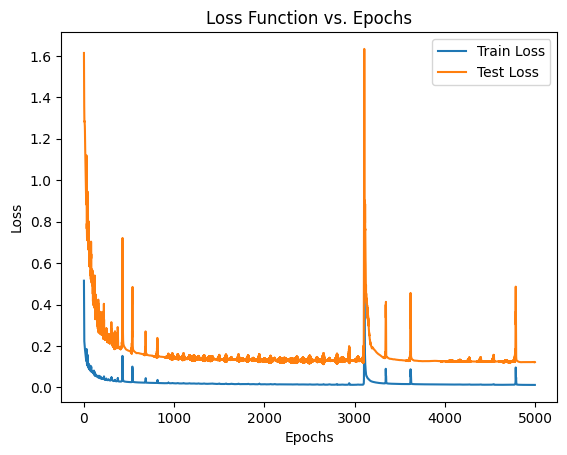

Final Train Loss: 0.0121
Final Test Loss: 0.1224
Final Train Accuracy: 0.9641
Final Test Accuracy: 0.9328
Final F1-Score: 0.9327


In [83]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

def calculate_loss(A3, Y):
  one_hot_Y = one_hot(Y)
  loss = -np.mean(one_hot_Y * np.log(A3 + 1e-8))
  return loss



train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
f1_scores = []

def train_and_evaluate(X_train, Y_train, X_test, Y_test, alpha, iterations):
  W1, b1, W2, b2, W3, b3 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_train)
    dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X_train, Y_train)
    W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

    # train loss and accuracy
    train_loss = calculate_loss(A3, Y_train)
    train_predictions = get_predictions(A3)
    train_accuracy = get_accuracy(train_predictions, Y_train)

    #  test loss and accuracy
    _, _, _, _, _, A3_test = forward_prop(W1, b1, W2, b2, W3, b3, X_test)
    test_loss = calculate_loss(A3_test, Y_test)
    test_predictions = get_predictions(A3_test)
    test_accuracy = get_accuracy(test_predictions, Y_test)

    #  F1-score
    f1 = f1_score(Y_test, test_predictions, average='weighted')

    # Store metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    f1_scores.append(f1)

    if i % 10 == 0:
        print(f"Iteration: {i}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, F1-Score: {f1:.4f}")
  return W1, b1, W2, b2, W3, b3


W1, b1, W2, b2, W3, b3 = train_and_evaluate(X_train, Y_train, X_test, Y_test, 0.10, 5000)

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.legend()
plt.show()

# final results
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")
print(f"Final Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final F1-Score: {f1_scores[-1]:.4f}")


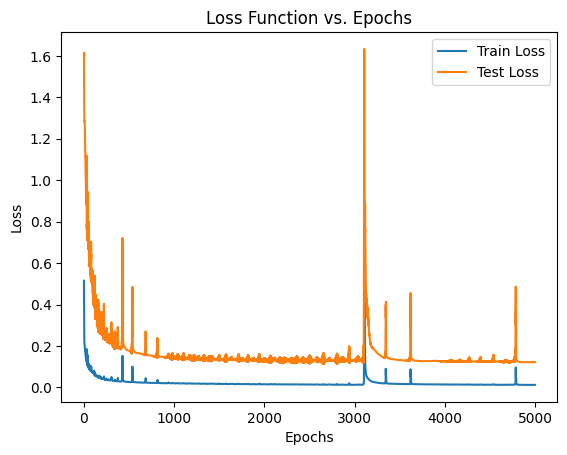

# **Pickle Dumping of Parameter Matrices & Final Parameters**

In [124]:
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")
print(f"Final Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final F1-Score: {f1_scores[-1]:.4f}")

model = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    'W3': W3,
    'b3': b3
}

with open('/content/drive/MyDrive/Datasets/numbers', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to '/content/drive/MyDrive/Datasets/numbers'")


Final Train Loss: 0.0121
Final Test Loss: 0.1224
Final Train Accuracy: 0.9641
Final Test Accuracy: 0.9328
Final F1-Score: 0.9327
Model saved to '/content/drive/MyDrive/Datasets/numbers'


In [93]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _,A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
    predictions = get_predictions(A3)
    return predictions

# **Test Data**

In [94]:
tester=pd.read_csv('/content/drive/MyDrive/Datasets/mnist_test.csv')
tester = np.array(tester)
m, n = tester.shape
np.random.shuffle(tester)

tester_test = tester.T
Y_test = tester_test[0]
X_test = tester_test[1:n]
X_test = X_test
_,m_test = X_test.shape

**Accuracy Checker**

In [95]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2,W3,b3)
get_accuracy(dev_predictions, Y_test)


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))


0.9328

In [96]:

import pickle

model = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    'W3': W3,
    'b3': b3
}

with open('numbers', 'wb') as f:
    pickle.dump(model, f)


# **Confusion Matrix**

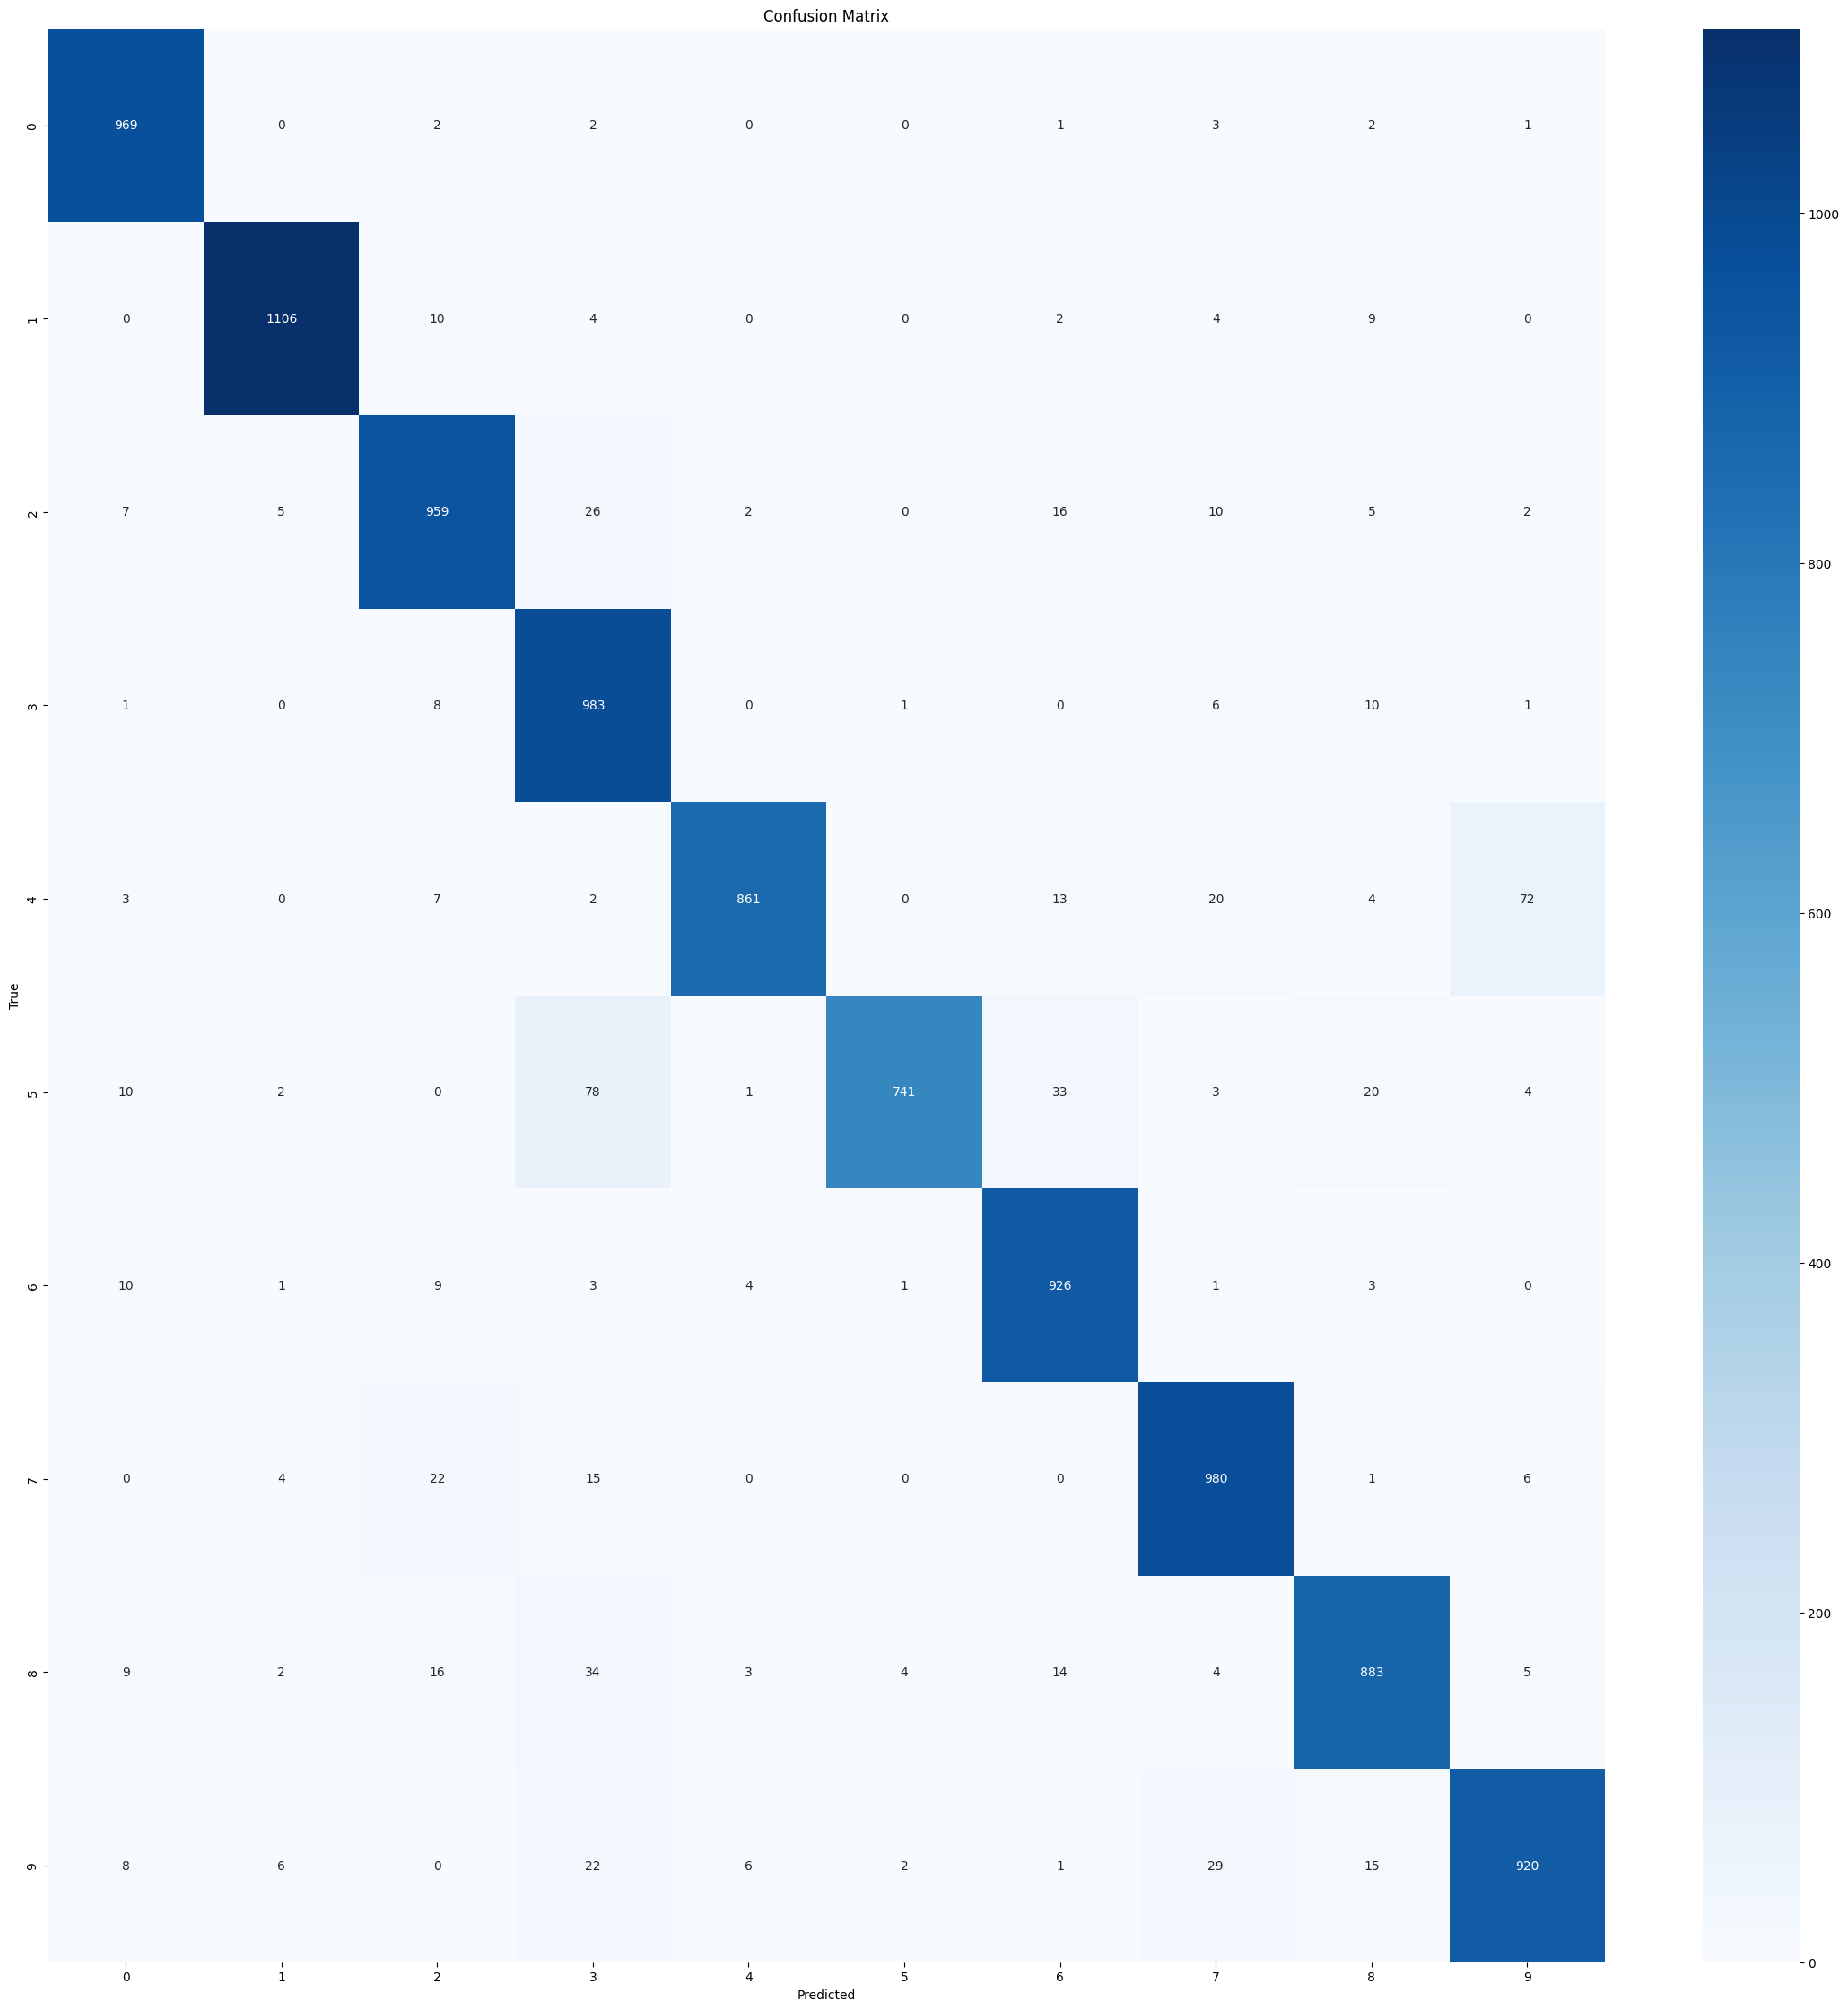

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(Y_true, Y_pred):
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(28,28))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(Y_test, dev_predictions)


# **Final Accuracy Check**

In [110]:
from sklearn.metrics import f1_score

def compute_f1_score(Y_true, Y_pred):
    return f1_score(Y_true, Y_pred, average='weighted')

_, _, _, _, _,A3 = forward_prop(W1, b1, W2, b2,W3,b3, X_test)

predictions_test = get_predictions(A3)
f1 = compute_f1_score(Y_test, predictions_test)
print(f"F1-Score: {f1:.3f}")

F1-Score: 0.933


<ipython-input-64-7be0e93e940a>:4: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))


# **Joblib Dumping**

In [149]:
import joblib

model = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    'W3': W3,
    'b3': b3
}

joblib.dump(model, 'mnist_openheart.joblib')


['mnist_openheart.joblib']

In [151]:
from google.colab import files

files.download('mnist_openheart.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# **Activation Function Choice**(mReLU)

The choice of using a combination of Mish and ReLU inthis  neural network can offer several advantages over the traditional ReLU activation function.

### 1. **Smoothness and Non-linearity:**
- **Mish Function:**
  - The Mish activation function is smooth and continuous, allowing for a gentler transition at the boundaries. This smoothness promotes better gradient flow during backpropagation, helping to avoid issues like vanishing gradients that can happen with hard nonlinearities like ReLU.
  - The non-linearity of the Mish function (being non-monotonic) enables it to capture complex patterns in the data more effectively than ReLU, which is just a piecewise linear function.

### 2. **Enhanced Gradient Flow:**
- **Gradient Propagation:**
  - ReLU can encounter the "dying ReLU" problem, where neurons become inactive and stop learning if they output zero for all inputs. In contrast, mReLU maintains some gradient for negative inputs (thanks to the softplus function), reducing the chance of neurons becoming inactive.
  - The smoother gradient transition in Mish allows for more effective learning and convergence during training, which can result in better performance for my model.

### 3. **Output Characteristics:**
- **Negative Values:**
  - Using mReLU allows negative activations (from Mish) to propagate, which can be beneficial for capturing complex patterns in the data. Traditional ReLU zeros out all negative values, potentially losing important information.
- **Regularization:**
  - The non-linear characteristics of Mish, combined with ReLU's zeroing nature (in mReLU), act as a form of implicit regularization, helping my model generalize better on unseen data.

### 4. **Empirical Performance:**
- **Better Accuracy:**
  - Many experiments and empirical studies have shown that advanced activation functions like Mish can lead to improved model performance and higher accuracy in tasks like image classification, object detection, and other complex challenges compared to traditional ReLU.

